# Проект Авторынок Казахстана

**Описание данных**
- Датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из
официальной статистики VAG, после перевода из эксель в csv обнаружились множественные
проблемы с исходными данными: некорректные разделители десятичных разрядов, несоответствие
данных типу данных. Дополнительной проблемой является то, что статистику собирал не один
человек, поэтому есть неявные дубликаты - например, 4WD, 4 WD и 4-WD, а также одни и те же
признаки могут быть записаны как на русском, так и на английском языке. Также необходимо
очистить датасет от лишних столбцов, которые используют технические специалисты, но которые не
нужны в управленческом учете.

**Задачи**
- Предобработать данные
- Исследовать автомомильный рынок Казахстана

# Загрузка данных

https://drive.google.com/file/d/12CRkOSz9bpWnev2sEUO6P96Ya94P3_-4/view?usp=sharing

In [1]:
! gdown --id 12CRkOSz9bpWnev2sEUO6P96Ya94P3_-4

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12CRkOSz9bpWnev2sEUO6P96Ya94P3_-4
To: /content/kz_2019_final_all_dirt.csv
100% 12.2M/12.2M [00:00<00:00, 98.0MB/s]


# Чтение данных

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import datetime

import warnings
warnings.filterwarnings(action='ignore')
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/content/kz_2019_final_all_dirt.csv', decimal=',', index_col=0)

In [4]:
# посмотрим данные
display(data.head())
data.info()
print('*'*50)
print(f'Количество дубликатов: {data.duplicated().sum()}')

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,S-tronic,NaN,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,30581.0,30581.0,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тroic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Астана,Физ. Лицо,наличный,1.0,35087.719,35087.719,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,S-troic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,26608.232900297386,26608.232900297386,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,S-troic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,48343.98264845536,48343.98264845536,г.Алматы,Легковые автомобили,D класс,D,Импорт


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Год                             32854 non-null  int64 
 1   Месяц                           32854 non-null  object
 2   Компания                        32854 non-null  object
 3   Бренд                           32854 non-null  object
 4   Модель                          32854 non-null  object
 5   Модификация                     29729 non-null  object
 6   Год выпуска                     32700 non-null  object
 7   Страна-производитель            32854 non-null  object
 8   Вид топлива                     31942 non-null  object
 9   Объём двиг, л,                  30968 non-null  object
 10  Коробка передач                 31662 non-null  object
 11  Тип привода                     30589 non-null  object
 12  Сегмент                         28066 non-null

В предоставленных данных 32854 строчки и 25 столбцов.
Много пропусков.

# Предобработка данных

In [5]:
# приведем всё к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'модификация',
       'год выпуска', 'страна-производитель', 'вид топлива', 'объём двиг, л,',
       'коробка передач', 'тип привода', 'сегмент', 'регион',
       'наименование дилерского центра', 'тип клиента', 'форма расчета',
       'количество', 'цена, usd', 'продажа, usd', 'область',
       'сегментация 2013', 'класс 2013', 'сегментация eng',
       'локализация производства'],
      dtype='object')

## По тех.заданию удалим ненужные столбцы, объединим месяц и год.

Объединим месяц и год, приведем к типу datetime

In [6]:
data['месяц'] = data['месяц'].replace(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [7]:
data['date'] = data['год'].apply(str) + ' - ' + data['месяц'].apply(str)

In [8]:
data['date'] = pd.to_datetime(data['date'])

Удаляем столбцы: `Модификация`, `Сегмент`, `Наименование дилерского центра`, `Форма расчета`, `Сегментация Eng` и` Локализация производства` + `Год` и `Месяц`(они либо бесполезны, либо много пропусков)

In [9]:
data = data.drop(columns = ['модификация', 'сегмент', 'наименование дилерского центра', 'форма расчета', 'локализация производства', 'год', 'месяц'], axis = 1)

In [10]:
display(data.head(1))

,компания,бренд,модель,год выпуска,страна-производитель,вид топлива,"объём двиг, л,",коробка передач,тип привода,регион,тип клиента,количество,"цена, usd","продажа, usd",область,сегментация 2013,класс 2013,сегментация eng,date
0,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,Физ. Лицо,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,2019-03-01


## Названия столбцов

In [11]:
# приведем названия столбцов к 'хорошему тону'
data = data.rename(columns={'компания': 'company',
                            'бренд': 'brand',
                            'модель': 'model',
                            'год выпуска': 'year',
                            'страна-производитель': 'country_manufacturer',
                            'вид топлива': 'type_of_fuel',
                            'объём двиг, л,': 'vol_eng_lit',
                            'коробка передач': 'transmission',
                            'тип привода': 'type_of_drive',
                            'регион': 'region',
                            'тип клиента': 'client_type',
                            'количество': 'quantity',
                            'цена, usd': 'price_usd',
                            'продажа, usd': 'sale_usd',
                            'область': 'area',
                            'сегментация 2013': 'segmentation_2013',
                            'класс 2013': 'class_2013',})
# проверим
data.head(1)

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
0,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,Физ. Лицо,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,2019-03-01


## Тип данных

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company               32854 non-null  object        
 1   brand                 32854 non-null  object        
 2   model                 32854 non-null  object        
 3   year                  32700 non-null  object        
 4   country_manufacturer  32854 non-null  object        
 5   type_of_fuel          31942 non-null  object        
 6   vol_eng_lit           30968 non-null  object        
 7   transmission          31662 non-null  object        
 8   type_of_drive         30589 non-null  object        
 9   region                32854 non-null  object        
 10  client_type           27124 non-null  object        
 11  quantity              32849 non-null  object        
 12  price_usd             32854 non-null  object        
 13  sale_usd        

In [13]:
# посмотрим vol_eng_lit, не дает сразу преобразовать в числовой тип
data.vol_eng_lit.unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '3,5', '5.7', '10.5', '6.7', '2/2,5',
       '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3',
       '0.002', '0.0016', '1998', '13', '16', '1400', '2.3', '1.33',
       '2,4G', '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8',
       '17.5', '1,2T', '4.88', '4.0'], dtype=object)

In [14]:
# уберем названния с пробелами, буквами и запятой
data['vol_eng_lit'] = data['vol_eng_lit'].replace(['1400 turbo', '1,4 Turbo', '1,6 T-GDI', '3,5', '2,4G', '1,2T', '2/2,5'],
                                                  ['1.4', '1.4', '1.6', '3.5', '2.4', '1.2', '2.5'])

In [15]:
# vol_eng_lit преобразуем в нужный тип данных позже (для моего удобства)
#data['vol_eng_lit'] = data['vol_eng_lit'].astype(float)
data['quantity'] = data['quantity'].astype(float)
data['price_usd'] = data['price_usd'].astype(float)
data['sale_usd'] = data['sale_usd'].astype(float)

In [16]:
# уберем копейки
data['price_usd'] = round(data['price_usd'], 0)
data['sale_usd'] = round(data['sale_usd'], 0)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company               32854 non-null  object        
 1   brand                 32854 non-null  object        
 2   model                 32854 non-null  object        
 3   year                  32700 non-null  object        
 4   country_manufacturer  32854 non-null  object        
 5   type_of_fuel          31942 non-null  object        
 6   vol_eng_lit           30968 non-null  object        
 7   transmission          31662 non-null  object        
 8   type_of_drive         30589 non-null  object        
 9   region                32854 non-null  object        
 10  client_type           27124 non-null  object        
 11  quantity              32849 non-null  float64       
 12  price_usd             32854 non-null  float64       
 13  sale_usd        

Идём дальше

## Дубликаты

In [18]:
# посмотрим дубликаты
print(f'Количество идентичных строк: {data.duplicated().sum()}')

Количество идентичных строк: 15941


Дубликаты оставляем, так как каждая строчка может быть об уникальной продаже.

## Посмотрим уникальные значения

Посмотрим компании

In [19]:
data.company.value_counts()

Toyota Motor Kazakhstan          10442
Astana Motors                     5746
БИПЭК АВТО                        3595
Вираж                             3358
УзАвто-Казахстан                  1727
Allur Auto                        1359
Renault Россия                    1088
Nissan Manufacturing RUS          1037
Mercur Auto                        940
ТК КАМАЗ                           888
Лифан Моторс Рус                   566
Subaru Kazakhstan                  520
ММС Рус                            279
Автоцентр-Бавария                  198
СВС                                184
Каспиан Моторс                     168
Jaguar Land Rover                  164
Autokapital                        156
Автомир ГК                         111
СемАЗ                               70
MMC RUS                             33
Хино Моторс Казахстан               31
Алматы АТО                          30
Hyundai Com Trans Kazakhstan        28
Eurasia Motor Premium               24
Scandinavian Motors      

In [20]:
# объединим пару названий
data['company'] = data['company'].replace(['Хино Моторс Казахстан', 'Каспиан Моторс', 'MMC RUS', 'СВС'],
 ['Hino Motors Kazakhstan', 'Caspian Motors', 'ММС Рус', 'СВС-ТРАНС'])

Посмотрим бренды

In [21]:
data.brand.value_counts()

Toyota                  9374
Hyundai                 5703
Lada                    2116
GAZ                     2111
Ravon                   1727
Renault                 1332
Lexus                   1068
Jac                     1027
UAZ                      954
Nissan                   948
KAMAZ                    888
Volkswagen               777
Chevrolet                675
Kia                      654
Lifan                    566
Subaru                   520
Mitsubishi               312
Skoda                    252
Isuzu                    199
BMW                      185
Ford                     183
Land Rover               149
Peugeot                  132
Mercedes-Benz            115
Mazda                    111
Iveco                    109
Audi                     103
Infiniti                  89
ANKAI                     75
Hyundai Truck & Bus       67
Porsche                   60
Mercedes-Benz Trucks      41
Shacman                   36
Hino                      33
Volvo         

Посмотрим год выпуска

In [22]:
data['year'].value_counts()

2018     21964
2017      8777
2 018     1445
2016       227
2 017      153
2018        57
2015        30
2017        27
2014         6
2 016        5
2013         3
2011         2
2012         2
2015         1
2016         1
Name: year, dtype: int64

Странно, что есть пробелы в годах, такого быть не должно.

In [23]:
# Нашла вариант в интернете. Были 'сломанные строки', преобразовали их в nan
data['year'] = data['year'].str.split().str.join('')

In [24]:
data['year'].isna().sum()

240

In [25]:
# удалим 240 строк с nan
data = data.dropna(subset=['year'])

In [26]:
# преобразуем в int по ТЗ
data['year'] = data['year'].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32614 entries, 0 to 32767
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company               32614 non-null  object        
 1   brand                 32614 non-null  object        
 2   model                 32614 non-null  object        
 3   year                  32614 non-null  int64         
 4   country_manufacturer  32614 non-null  object        
 5   type_of_fuel          31743 non-null  object        
 6   vol_eng_lit           30847 non-null  object        
 7   transmission          31532 non-null  object        
 8   type_of_drive         30397 non-null  object        
 9   region                32614 non-null  object        
 10  client_type           27040 non-null  object        
 11  quantity              32609 non-null  float64       
 12  price_usd             32614 non-null  float64       
 13  sale_usd        

Посмотрим страну-производитель

In [28]:
data['country_manufacturer'].value_counts()

Российская Федерация    12080
Республика Казахстан    11474
Япония                   4947
Турция                   1214
Узбекистан               1177
Таиланд                   878
Германия                  349
UK                        232
США                       188
Швеция                     21
Белоруссия                 17
Нидерланды                 17
Корея                      12
Австрия                     5
Венгрия                     2
Вьетнам                     1
Name: country_manufacturer, dtype: int64

согласно ТЗ, кодируем страны в столбце country_manufacturer в alpha3 (RUS, KAZ, USA и т.д.)

In [29]:
data['country_manufacturer'] = data['country_manufacturer'].replace(['Российская Федерация',
                                                                     'Республика Казахстан',
                                                                     'Япония',
                                                                     'Турция',
                                                                     'Узбекистан',
                                                                     'Таиланд',
                                                                     'Германия',
                                                                     'США',
                                                                     'Швеция',
                                                                     'Белоруссия',
                                                                     'Нидерланды',
                                                                     'Корея',
                                                                     'Австрия',
                                                                     'Венгрия',
                                                                     'Вьетнам'],
 ['RUS', 'KAZ', 'JPN', 'TUR', 'UZB', 'THA', 'DEU', 'USA', 'SWE', 'BLR', 'NLD', 'KOR', 'AUT', 'HUN', 'VNM'])

In [30]:
data.loc[data['country_manufacturer'] == 'UK']

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
9041,Nissan Manufacturing RUS,Infiniti,Q30,2017,UK,Бензин,2,AT,AWD,Алматы,NaN,2.0,40495.0,80991.0,г.Алматы,Легковые автомобили,D класс,D,2019-04-01
9060,Nissan Manufacturing RUS,Infiniti,QX30,2017,UK,Бензин,2,AT,4WD,Алматы,NaN,1.0,43053.0,43053.0,г.Алматы,Внедорожники,Компактные SUV,K1,2019-01-01
9061,Nissan Manufacturing RUS,Infiniti,QX30,2017,UK,Бензин,2,AT,AWD,Алматы,NaN,1.0,43372.0,43372.0,г.Алматы,Внедорожники,Компактные SUV,K1,2019-04-01
9062,Nissan Manufacturing RUS,Infiniti,QX30,2017,UK,Бензин,2,AT,AWD,Алматы,NaN,1.0,43372.0,43372.0,г.Алматы,Внедорожники,Компактные SUV,K1,2019-04-01
9063,Nissan Manufacturing RUS,Infiniti,QX30,2017,UK,Бензин,2,АТ,AWD,Астана,NaN,1.0,33750.0,33750.0,г.Астана,Внедорожники,Компактные SUV,K1,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32265,Jaguar Land Rover,Land Rover,Range Rover Velar,2018,UK,NaN,NaN,NaN,NaN,Астана,Физ. Лицо,1.0,69721.0,69721.0,г.Астана,Внедорожники,Среднеразмерные SUV,K1,2019-09-01
32266,Jaguar Land Rover,Land Rover,Range Rover Velar,2018,UK,NaN,NaN,NaN,NaN,Алматы,Физ. Лицо,1.0,69721.0,69721.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-09-01
32338,Jaguar Land Rover,Jaguar,E-PACE,2018,UK,Бензин,2,NaN,NaN,Астана,NaN,1.0,44264.0,44264.0,г.Астана,Внедорожники,Компактные SUV,K1,2019-03-01
32339,Jaguar Land Rover,Jaguar,E-PACE,2018,UK,NaN,NaN,NaN,NaN,Астана,Физ. Лицо,1.0,42238.0,42238.0,г.Астана,Внедорожники,Компактные SUV,K1,2019-06-01


Думаю, что UK - это United Kingdom, так как ниссан собирают в основном там

In [31]:
data['country_manufacturer'] = data['country_manufacturer'].replace(['UK'], ['GBR'])

Посмотрим регион

In [32]:
data['region'].value_counts()

Алматы              9162
Астана              6974
Атырау              2074
Шымкент             2021
Костанай            2019
Караганда           1712
Уральск             1456
Актау               1240
Актобе              1210
Усть-Каменогорск    1157
Павлодар            1004
Кызылорда            526
Петропавловск        462
Кокшетау             392
ЭКСПОРТ              298
Семей                268
Тараз                254
Талдыкорган          189
Экибастуз             89
Риддер                59
Рудный                38
Аксай                  5
Щучинск                4
Шемонаиха              1
Name: region, dtype: int64

In [33]:
data.loc[data['region'] == 'ЭКСПОРТ']

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
10027,Allur Auto,Jac,S3,2017,KAZ,Бензин,1.5,MT,2WD,ЭКСПОРТ,Юр. Лицо,1.0,12580.0,12580.0,Экспорт область,Внедорожники,Компактные SUV,K1,2019-02-01
10028,Allur Auto,Jac,S3,2017,KAZ,Бензин,1.5,MT,2WD,ЭКСПОРТ,Юр. Лицо,1.0,12580.0,12580.0,Экспорт область,Внедорожники,Компактные SUV,K1,2019-02-01
10029,Allur Auto,Jac,S3,2018,KAZ,Бензин,1.6,CVT,2 WD,ЭКСПОРТ,Юр. Лицо,1.0,11474.0,11474.0,Экспорт область,Внедорожники,Компактные SUV,K1,2019-07-01
10030,Allur Auto,Jac,S3,2018,KAZ,Бензин,1.6,CVT,2 WD,ЭКСПОРТ,Юр. Лицо,1.0,11474.0,11474.0,Экспорт область,Внедорожники,Компактные SUV,K1,2019-07-01
10031,Allur Auto,Jac,S3,2018,KAZ,Бензин,1.6,CVT,2 WD,ЭКСПОРТ,Юр. Лицо,1.0,11474.0,11474.0,Экспорт область,Внедорожники,Компактные SUV,K1,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32721,Toyota Motor Kazakhstan,Toyota,C-HR,2018,TUR,Бензин,1.2,CVT (вариатор),AWD,ЭКСПОРТ,Физ. Лицо,1.0,32351.0,32351.0,Экспорт область,Внедорожники,Среднеразмерные SUV,K1,2019-06-01
32722,Toyota Motor Kazakhstan,Toyota,C-HR,2018,TUR,Бензин,1.2,CVT (вариатор),AWD,ЭКСПОРТ,Физ. Лицо,1.0,32351.0,32351.0,Экспорт область,Внедорожники,Среднеразмерные SUV,K1,2019-06-01
32723,Toyota Motor Kazakhstan,Toyota,C-HR,2018,TUR,Бензин,1.2,CVT (вариатор),AWD,ЭКСПОРТ,Юр. Лицо,1.0,30387.0,30387.0,Экспорт область,Внедорожники,Среднеразмерные SUV,K1,2019-06-01
32724,Toyota Motor Kazakhstan,Toyota,C-HR,2018,TUR,Бензин,1.2,CVT (вариатор),AWD,ЭКСПОРТ,Физ. Лицо,1.0,31576.0,31576.0,Экспорт область,Внедорожники,Среднеразмерные SUV,K1,2019-07-01


Удалим ЭКСПОРТ

In [34]:
data = data[data['region'] != 'ЭКСПОРТ']

Посмотрим тип клиента

In [35]:
data['client_type'].value_counts()

Физ. Лицо    19789
Юр. Лицо      6949
                 5
Name: client_type, dtype: int64

Столбец можно удалить, но пока оставим для исследования аномальных продаж

Посмотрим область

In [36]:
data['area'].value_counts()

г.Алматы                          9162
г.Астана                          6974
Атырауская область                2074
Костанайская область              2057
Южно-Казахстанская область        2021
Карагандинская область            1712
Восточно-Казахстанская область    1485
Западно-Казахстанская область     1461
Мангистауская область             1240
Актюбинская область               1210
Павлодарская область              1093
Кызылординская область             526
Северо-Казахстанская область       462
Акмолинская область                396
Жамбылская область                 254
Алматинская область                189
Name: area, dtype: int64

Посмотрим Сегментация 2013

In [37]:
data['segmentation_2013'].value_counts()

Внедорожники                14011
Легковые автомобили         13221
Коммерческие автомобили      4154
Пикапы                        870
Минивэны                       60
Name: segmentation_2013, dtype: int64

Посмотрим Класс 2013

In [38]:
data['class_2013'].value_counts()

B класс                       6102
Компактные SUV                4748
E класс                       3652
C класс                       3120
Среднеразмерные SUV           2918
Субкомпактные SUV             2406
Стандартные SUV               2191
Малотоннажные грузовики       1947
Полноразмерные SUV            1748
Крупнотоннажные грузовики     1047
Pick-ups                       870
Развозные автомобили           775
Микроавтобусы                  246
A класс                        159
D класс                        109
F класс                         74
Среднетоннажные грузовики       70
Большие автобусы                60
Полноразмерный Минивэн          52
Средние автобусы                 9
Компактвэн                       8
Спортивные автомобили            5
Name: class_2013, dtype: int64

In [39]:
data['сегментация eng'].value_counts()

K1    9644
B     6102
E     3704
C     3120
K2    2550
N     1947
K3    1580
O     1177
L2    1077
K4     870
I      185
A      159
D      109
F       74
M        8
L1       5
G2       4
G1       1
Name: сегментация eng, dtype: int64

## Посмотрим пропуски

In [40]:
# посмотрим процент пропусков
numbers_of_nulls = pd.DataFrame(columns=['date'], data=data.columns)
numbers_of_nulls['nulls'] = data.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/data.shape[0]
numbers_of_nulls.sort_values(by='nulls')

,date,nulls,nulls_percent
0,company,0,0.000000
16,class_2013,0,0.000000
15,segmentation_2013,0,0.000000
14,area,0,0.000000
13,sale_usd,0,0.000000
12,price_usd,0,0.000000
17,сегментация eng,0,0.000000
9,region,0,0.000000
4,country_manufacturer,0,0.000000
3,year,0,0.000000


In [41]:
# удалим строки с пропущенными значенями в столбцах "количество" - это малый процент
data = data.dropna(subset=['quantity'])

### Посмотрим коробку передач

In [42]:
data['transmission'].value_counts()
data.transmission.unique()

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ', nan,
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', 'АКПП6', 'АКПП4',
       '9AT', 'АКПП', 'АКПП8', 'МКПП4', 'МКПП5', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVТ(вариатор)', '9АТ', '12AT', '7AT', '7АТ',
       '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП', '8-ступ АКПП', '8',
       ' -', '-', '7 DSG', '7DSG', '6 DSG', '6DSG', 'CVТ(вАриАтор)',
       '5MТ', 'АТ (автомат)', '8 AT 4Motion', '8АТ4МoТion', '6A', '5M',
       '6-ступАКПП', '6А', 'AT (автомат)', '7DSG4МoТion', '6Aвтомат',
       '6Aатомат', '5М', '5-ступМТ', 'АT', 'A/T', '7АT', 'МТ (механика)',
      

In [43]:
# преобразуем в Автомат, Механика, Вариатор и Робот
data['transmission'] = data['transmission'].replace(['AT', '6 АТ', '6AT', '6АT', '6 AT', '8АТ', '5AT', '5АТ', 'АТ', '4АТ',
                                                     '8 АТ', '8AT', '6АТ', '4 АТ', 'AMT', '4AT', 'АКПП6', 'АКПП4', '9AT', 'АКПП',
                                                     'АКПП8', '9АТ', '12AT', '7AT', '7АТ', '8АКП', '8-ступ АКПП', '8АКПП',
                                                     'АТ (автомат)', '8 AT 4Motion', '8АТ4МoТion', '6A', '6-ступАКПП', '6А',
                                                     'AT (автомат)', '6Aвтомат', '6Aатомат', 'АT', 'A/T', '7АT',
                                                     'Steptronic', 'SТepТronic', 'ТipТronic', 'Tiptronic', '8'], 'Автомат')

In [44]:
data['transmission'] = data['transmission'].replace(['5 МТ', '5MT', '5МТ', 'MT', 'МТ', 'MТ', '6MT', '6МТ', '6MТ', 'Мех.',
                                                     'МКПП', '6 MT', '6 МТ', 'МКПП4', 'МКПП5', '6М/Т', '6M/T', '5MТ', '5M',
                                                     '5М', '5-ступМТ', '6M/Т', 'МТ (механика)', 'N', 'Механическая'], 'Механика')

In [45]:
data['transmission'] = data['transmission'].replace(['CVT(вариатор)', 'CVT', 'CVТ', 'CVT (вариатор)', 'CVT(вариATор)',
                                                     'Вариатор', 'CVТ(вариатор)', 'CVТ(вАриАтор)'
                                                    ], 'Вариатор')

In [46]:
data['transmission'] = data['transmission'].replace(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', '7 DSG',
                                                     '7DSG', '6 DSG', '6DSG', '7DSG4МoТion', 'Powershift S6', 'PowershiftS6',
                                                     'PowershifТS6', '7DCT', '7 DCT', '7DCТ', 'PDK'
                                                    ], 'Робот')

In [47]:
data.transmission.unique()

array(['Робот', 'Автомат', 'Механика', nan, 'Вариатор', '0', ' -', '-'],
      dtype=object)

In [48]:
data.loc[(data['model'] == 'Terrano') & (data['transmission'] == '0'), 'transmission'] == 'Механика'

16576    False
Name: transmission, dtype: bool

Пропуски и остальные значения заполним в другом разделе проекта

### Посмотрим вид топлива

In [49]:
data['type_of_fuel'].value_counts()

Бензин           29810
Дизель            1544
Газовый             38
Электрический       26
гибрид              18
0                    4
дизель               1
Name: type_of_fuel, dtype: int64

In [50]:
data['type_of_fuel'] = data['type_of_fuel'].replace(['дизель '], ['Дизель'])
data['type_of_fuel'] = data['type_of_fuel'].replace(['гибрид'], ['Гибрид'])

In [51]:
data.loc[(data['type_of_fuel'] == '0')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
19519,Renault Россия,Renault,Kaptur,2018,RUS,0,1.6,Вариатор,NaN,Петропавловск,NaN,1.0,18155.0,18155.0,Северо-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-02-01
19732,Renault Россия,Renault,Koleos,2017,RUS,0,0,0,NaN,Караганда,NaN,1.0,34691.0,34691.0,Карагандинская область,Внедорожники,Компактные SUV,K1,2019-02-01
19733,Renault Россия,Renault,Koleos,2017,RUS,0,0,0,NaN,Астана,NaN,1.0,34691.0,34691.0,г.Астана,Внедорожники,Компактные SUV,K1,2019-02-01
19953,Renault Россия,Renault,Sandero,2018,RUS,0,0,0,NaN,Астана,NaN,1.0,14138.0,14138.0,г.Астана,Легковые автомобили,B класс,B,2019-02-01


In [52]:
data.loc[(data['model'] == 'Kaptur') & (data['year'] == 2018) & (data['transmission'] == 'Вариатор')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
19504,Renault Россия,Renault,Kaptur,2018,RUS,Бензин,1.6,Вариатор,NaN,Уральск,NaN,1.0,18155.0,18155.0,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-02-01
19509,Renault Россия,Renault,Kaptur,2018,RUS,Бензин,1.6,Вариатор,NaN,Караганда,NaN,1.0,18155.0,18155.0,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,2019-02-01
19519,Renault Россия,Renault,Kaptur,2018,RUS,0,1.6,Вариатор,NaN,Петропавловск,NaN,1.0,18155.0,18155.0,Северо-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-02-01
19545,Renault Россия,Renault,Kaptur,2018,RUS,NaN,1.6,Вариатор,4x2,Усть-Каменогорск,Физ. Лицо,1.0,17735.0,17735.0,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-04-01
19546,Renault Россия,Renault,Kaptur,2018,RUS,NaN,1.6,Вариатор,4x2,Усть-Каменогорск,Физ. Лицо,1.0,17735.0,17735.0,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-04-01
19574,Renault Россия,Renault,Kaptur,2018,RUS,NaN,1.6,Вариатор,4x2,Караганда,Физ. Лицо,1.0,17551.0,17551.0,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,2019-05-01
19575,Renault Россия,Renault,Kaptur,2018,RUS,NaN,1.6,Вариатор,4x2,Караганда,Физ. Лицо,1.0,17551.0,17551.0,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,2019-05-01
19581,Renault Россия,Renault,Kaptur,2018,RUS,NaN,1.6,Вариатор,4x2,Астана,Физ. Лицо,1.0,17551.0,17551.0,г.Астана,Внедорожники,Субкомпактные SUV,K1,2019-05-01


In [53]:
# в основном вид топливо - бензин, заполним пропуски. Тип привода тоже заполним
data.loc[(data['model'] == 'Kaptur') & (data['year'] == 2018) & (data['transmission'] == 'Вариатор'), 'type_of_fuel'] = 'Бензин'
data.loc[(data['model'] == 'Kaptur') & (data['year'] == 2018) & (data['type_of_fuel'] == '0') & (data['transmission'] == 'Вариатор'), 'type_of_drive'] = '4x2'

In [54]:
# В России, думаю, что и в Казахстане были доступны варианты только с вариатором и полным приводом
data.loc[(data['model'] == 'Koleos'), 'transmission'] = 'Вариатор'
data.loc[(data['model'] == 'Koleos'), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Koleos'), 'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Koleos'), 'type_of_fuel'] = 'Бензин'

In [55]:
# заполним пропуски аналогичными данным
data.loc[(data['model'] == 'Sandero')&(data['type_of_fuel'] == '0'), 'type_of_fuel'] = 'Бензин'
data.loc[(data['model'] == 'Sandero')&(data['type_of_fuel'] == '0'), 'vol_eng_lit'] = '1.6'
data.loc[(data['model'] == 'Sandero')&(data['type_of_fuel'] == '0'), 'transmission'] = 'Автомат'

In [56]:
data['type_of_fuel'].value_counts()

Бензин           29833
Дизель            1545
Газовый             38
Электрический       26
Гибрид              18
Name: type_of_fuel, dtype: int64

### Посмотрим объем двигателя

In [57]:
data['vol_eng_lit'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '2.5', '1.6',
       '3.5', '2.2', '2.7', '2.8', '4.2', '5', '3.9', '7.5', '11',
       '3.933', '12.3', '3.7', '5.6', '7.8', '2.9', '5.2', '10.3', '8.7',
       '1600', '1.998', '1.598', '1.248', '2.359', '2359', '1999', '3.8',
       '3800', '1.591', '1.368', '3.342', '3.47', '3470', '2000', '1.999',
       '1.69', '1690', '1.774', '1598', '1774', '4.9', '4.6', '5.7',
       '10.5', '6.7', '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '1998', 2.0, '13', '16', '1400',
       '2.3', '1.33', '2.693', '2693', '2.235', '2235', '2.0', '14860',
       '14.8', '17.5', '4.88'], dtype=object)

In [58]:
# переведем в литры
data.loc[data['vol_eng_lit'] == '1596', 'vol_eng_lit'] = '1.6'
data.loc[data['vol_eng_lit'] == '3000', 'vol_eng_lit'] = '3.0'
data.loc[data['vol_eng_lit'] == '2400', 'vol_eng_lit'] = '2.4'
data.loc[data['vol_eng_lit'] == '1800', 'vol_eng_lit'] = '1.8'
data.loc[data['vol_eng_lit'] == '1600', 'vol_eng_lit'] = '1.6'
data.loc[data['vol_eng_lit'] == '2359', 'vol_eng_lit'] = '2.359'
data.loc[data['vol_eng_lit'] == '1999', 'vol_eng_lit'] = '2.0'
data.loc[data['vol_eng_lit'] == '3800', 'vol_eng_lit'] = '3.8'
data.loc[data['vol_eng_lit'] == '3470', 'vol_eng_lit'] = '3.47'
data.loc[data['vol_eng_lit'] == '2000', 'vol_eng_lit'] = '2.0'
data.loc[data['vol_eng_lit'] == '1690', 'vol_eng_lit'] = '1.7'
data.loc[data['vol_eng_lit'] == '1598', 'vol_eng_lit'] = '1.6'
data.loc[data['vol_eng_lit'] == '1774', 'vol_eng_lit'] = '1.774'
data.loc[data['vol_eng_lit'] == '0.002', 'vol_eng_lit'] = '2.0'
data.loc[data['vol_eng_lit'] == '0.0016', 'vol_eng_lit'] = '1.6'
data.loc[data['vol_eng_lit'] == '1998', 'vol_eng_lit'] = '1.998'
data.loc[data['vol_eng_lit'] == '1400', 'vol_eng_lit'] = '1.4'
data.loc[data['vol_eng_lit'] == '2693', 'vol_eng_lit'] = '2.693'
data.loc[data['vol_eng_lit'] == '2235', 'vol_eng_lit'] = '2.235'
data.loc[data['vol_eng_lit'] == '14860', 'vol_eng_lit'] = '14.86'
data.loc[data['vol_eng_lit'] == '2', 'vol_eng_lit'] = '2.0'

In [59]:
data.loc[data['vol_eng_lit'] == '0']

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
174,Автоцентр-Бавария,BMW,i3,2018,DEU,Электрический,0,Автомат,RWD,Алматы,NaN,1.0,47132.0,47132.0,г.Алматы,Легковые автомобили,B класс,B,2019-06-01
19241,Renault Россия,Renault,Duster,2018,RUS,NaN,0,NaN,NaN,Алматы,Физ. Лицо,1.0,12902.0,12902.0,г.Алматы,Внедорожники,Компактные SUV,K1,2019-06-01
19242,Renault Россия,Renault,Duster,2018,RUS,NaN,0,NaN,NaN,Алматы,Физ. Лицо,1.0,12902.0,12902.0,г.Алматы,Внедорожники,Компактные SUV,K1,2019-06-01
19582,Renault Россия,Renault,Kaptur,2018,RUS,NaN,0,NaN,NaN,Уральск,Физ. Лицо,1.0,17136.0,17136.0,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-06-01
19583,Renault Россия,Renault,Kaptur,2018,RUS,NaN,0,NaN,NaN,Уральск,Физ. Лицо,1.0,17136.0,17136.0,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-06-01
19584,Renault Россия,Renault,Kaptur,2018,RUS,NaN,0,NaN,NaN,Уральск,Физ. Лицо,1.0,17136.0,17136.0,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-06-01
19585,Renault Россия,Renault,Kaptur,2018,RUS,NaN,0,NaN,NaN,Уральск,Физ. Лицо,1.0,17136.0,17136.0,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-06-01
19586,Renault Россия,Renault,Kaptur,2018,RUS,NaN,0,NaN,NaN,Караганда,Физ. Лицо,1.0,17136.0,17136.0,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,2019-06-01
19587,Renault Россия,Renault,Kaptur,2018,RUS,NaN,0,NaN,NaN,Караганда,Физ. Лицо,1.0,17136.0,17136.0,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,2019-06-01
19588,Renault Россия,Renault,Kaptur,2018,RUS,NaN,0,NaN,NaN,Караганда,Физ. Лицо,1.0,17136.0,17136.0,Карагандинская область,Внедорожники,Субкомпактные SUV,K1,2019-06-01


In [60]:
data.loc[(data['brand'] == 'BMW') &(data['model'] == 'i3'), 'vol_eng_lit'] = '0.7'
data.loc[(data['model'] == 'Duster') & (data['vol_eng_lit'] == '0'), 'type_of_fuel'] = 'Бензин'
data.loc[(data['model'] == 'Duster') & (data['vol_eng_lit'] == '0'), 'type_of_drive'] = '4WD'
data.loc[(data['model'] == 'Duster') & (data['vol_eng_lit'] == '0'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Duster') & (data['vol_eng_lit'] == '0'), 'vol_eng_lit'] = '2.0'

### Посмотрим тип привода

In [61]:
# посмотрим уникальные значения
data.type_of_drive.unique()

array([nan, 'FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD',
       'Полный', 'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ',
       'задний', '2WD', '2 WD', '4 WD', '4х4', '4х2', '4x2', '2х4', '4x4',
       'CVT', '0', 'Полный привод', ' -', '-', 'P/TIME', 'FF', 'полный',
       '4Motion', 'передний ', 'FR'], dtype=object)

Преобразуем данные в `Полный привод`, `Задний привод`, `Передний привод` и  `Подключаемый привод`

In [62]:
data['type_of_drive'] = data['type_of_drive'].replace(['quattro', 'Quattro', '4WD', 'Полный', 'AWD',
                                                     'Полный ', '4 WD', '4х4', '4x4', 'Полный привод', 'полный',
                                                     '4Motion', 'P/TIME'
                                                    ], 'Полный привод')

In [63]:
data['type_of_drive'] = data['type_of_drive'].replace(['FR', 'Задний', 'задний', 'RWD'
                                                    ], 'Задний привод')

In [64]:
data['type_of_drive'] = data['type_of_drive'].replace(['передний', 'FWD', 'Передний', 'FF', 'передний '
                                                    ], 'Передний привод')

In [65]:
data['type_of_drive'] = data['type_of_drive'].replace(['4х2.2', '2WD', '2 WD', '4х2', '4x2',
                                                     '2х4'
                                                    ], 'Подключаемый привод')

In [66]:
data['type_of_drive'].value_counts()

Полный привод          11994
Передний привод         9781
Подключаемый привод     6289
Задний привод           1924
0                        117
 -                         3
CVT                        2
-                          2
Name: type_of_drive, dtype: int64

In [67]:
# посмотрим оставшиеся значения
data.loc[(data['type_of_drive'] == '0')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
19133,Renault Россия,Renault,Duster,2018,RUS,Бензин,2.0,Автомат,0,Караганда,Физ. Лицо,1.0,13214.0,13214.0,Карагандинская область,Внедорожники,Компактные SUV,K1,2019-05-01
19134,Renault Россия,Renault,Duster,2018,RUS,Бензин,2.0,Автомат,0,Астана,Физ. Лицо,1.0,13214.0,13214.0,г.Астана,Внедорожники,Компактные SUV,K1,2019-05-01
19135,Renault Россия,Renault,Duster,2018,RUS,Бензин,2.0,Автомат,0,Караганда,Физ. Лицо,1.0,13214.0,13214.0,Карагандинская область,Внедорожники,Компактные SUV,K1,2019-05-01
19136,Renault Россия,Renault,Duster,2018,RUS,Бензин,2.0,Автомат,0,Караганда,Физ. Лицо,1.0,13214.0,13214.0,Карагандинская область,Внедорожники,Компактные SUV,K1,2019-05-01
19137,Renault Россия,Renault,Duster,2018,RUS,Бензин,2.0,Автомат,0,Караганда,Физ. Лицо,1.0,13214.0,13214.0,Карагандинская область,Внедорожники,Компактные SUV,K1,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20182,Renault Россия,Renault,Sandero,2018,RUS,Бензин,1.6,0,0,Алматы,Физ. Лицо,1.0,10492.0,10492.0,г.Алматы,Легковые автомобили,B класс,B,2019-08-01
20183,Renault Россия,Renault,Sandero,2018,RUS,Бензин,1.6,0,0,Алматы,Физ. Лицо,1.0,10492.0,10492.0,г.Алматы,Легковые автомобили,B класс,B,2019-08-01
20188,Renault Россия,Renault,Sandero,2018,RUS,Бензин,1.6,0,0,Астана,Юр. Лицо,1.0,10492.0,10492.0,г.Астана,Легковые автомобили,B класс,B,2019-08-01
20190,Renault Россия,Renault,Sandero,2018,RUS,Бензин,1.6,0,0,Астана,Физ. Лицо,1.0,10492.0,10492.0,г.Астана,Легковые автомобили,B класс,B,2019-08-01


In [68]:
data.loc[(data['type_of_drive'] == ' -')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
20231,Scania Central Asia,Scania,G-Series,2018,NLD,Дизель,13,-,-,Алматы,Юр. Лицо,2.0,111838.0,223676.0,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-07-01
20242,Scania Central Asia,Scania,R-Series,2018,NLD,Дизель,16,-,-,Алматы,Юр. Лицо,1.0,120552.0,120552.0,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-07-01
20243,Scania Central Asia,Scania,R-Series,2018,NLD,Дизель,13,-,-,Алматы,Юр. Лицо,4.0,120552.0,482210.0,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-07-01


In [69]:
data.loc[(data['type_of_drive'] == 'CVT')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
15895,ММС Рус,Mitsubishi,Outlander,2018,RUS,Бензин,2.0,Вариатор,CVT,Астана,NaN,1.0,29642.0,29642.0,г.Астана,Внедорожники,Среднеразмерные SUV,K1,2019-05-01
15896,ММС Рус,Mitsubishi,Outlander,2018,RUS,Бензин,2.0,Вариатор,CVT,Астана,NaN,1.0,29810.0,29810.0,г.Астана,Внедорожники,Среднеразмерные SUV,K1,2019-05-01


In [70]:
data.loc[(data['type_of_drive'] == '-')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
20244,Scania Central Asia,Scania,R-Series,2018,NLD,Дизель,13,-,-,Алматы,Юр. Лицо,2.0,107835.0,215670.0,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-08-01
20245,Scania Central Asia,Scania,R-Series,2018,NLD,Дизель,13,NaN,-,Алматы,Юр. Лицо,15.0,104969.0,1574539.0,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-09-01


In [71]:
# с помощью данных из инета и датафрейма заполним
data.loc[(data['model'] == 'G-Series')&(data['type_of_drive'] == ' -'), 'type_of_drive'] = 'Задний привод'
data.loc[(data['model'] == 'R-Series')&(data['type_of_drive'] == ' -'), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'R-Series')&(data['type_of_drive'] == '-'), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Outlander')&(data['type_of_drive'] == 'CVT'), 'type_of_drive'] = 'Полный привод'

## Заполнение пропусков

Начнем заполнять пропуски на основе похожих строк в датафрейме и с помощью информации в интернете.

#### type_of_fuel

In [72]:
# для удобства заполним пропуски нулями
data['type_of_fuel'] = data['type_of_fuel'].fillna(0)

In [73]:
data['type_of_fuel'].value_counts()

Бензин           29835
Дизель            1545
0                  849
Газовый             38
Электрический       26
Гибрид              18
Name: type_of_fuel, dtype: int64

In [74]:
# Я шла по списку моделей и заполняна пропуски в столбце type_of_fuel
data.loc[(data['type_of_fuel'] == 0)]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
1154,СемАЗ,Foton,BJ1032V3JB3-S,2015,KAZ,0,NaN,NaN,NaN,Семей,NaN,10.0,62392.0,623915.0,Восточно-Казахстанская область,Коммерческие автомобили,Малотоннажные грузовики,N,2019-03-01
1155,СемАЗ,Foton,BJ3143DKPGA-1,2015,KAZ,0,NaN,NaN,NaN,Семей,NaN,4.0,92954.0,371815.0,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-02-01
1156,СемАЗ,Foton,BJ3143DKPGA-1,2015,KAZ,0,NaN,NaN,NaN,Семей,NaN,1.0,22208.0,22208.0,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-03-01
1158,СемАЗ,Foton,BJ3253DMPKB-AD,2017,KAZ,0,NaN,NaN,NaN,Кокшетау,NaN,5.0,55692.0,278462.0,Акмолинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-04-01
1159,СемАЗ,Foton,BJ3253DMPKB-AD,2017,KAZ,0,NaN,NaN,NaN,Кокшетау,NaN,1.0,55161.0,55161.0,Акмолинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32578,СемАЗ,Shacman,SX3258DR384,2018,KAZ,0,NaN,NaN,NaN,Астана,NaN,4.0,56368.0,225473.0,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-08-01
32579,СемАЗ,Shacman,SX3258DR384,2018,KAZ,0,NaN,NaN,NaN,Усть-Каменогорск,NaN,1.0,54677.0,54677.0,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-09-01
32580,СемАЗ,Shacman,SX3258DR384,2018,KAZ,0,NaN,NaN,NaN,Семей,NaN,2.0,53166.0,106333.0,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-09-01
32581,СемАЗ,Shacman,SX3258DR384,2018,KAZ,0,NaN,NaN,NaN,Астана,NaN,3.0,53707.0,161120.0,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-09-01


При всём уважении к Фотон, я не могу найти информацию для заполнения пропусков.. поэтому предлагаю удалить.

In [75]:
data = data[data.brand != 'Foton']

In [76]:
# В датафрейме есть инф-ия о модели Universe, заполним аналогично
data.loc[(data['model'] == 'Universe')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 12.3
data.loc[(data['model'] == 'Universe')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'Universe')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Подключаемый привод'
data.loc[(data['model'] == 'Universe')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [77]:
# В датафрейме есть инф-ия о модели Q30, заполним аналогично
data.loc[(data['model'] == 'Q30')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Q30')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Q30')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Q30')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [78]:
# В датафрейме есть инф-ия о модели QX50, заполним аналогично
data.loc[(data['model'] == 'QX50')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.5
data.loc[(data['model'] == 'QX50')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'QX50')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'QX50')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [79]:
# В датафрейме есть инф-ия о модели D-MAX, заполним аналогично
data.loc[(data['model'] == 'D-MAX')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.5
data.loc[(data['model'] == 'D-MAX')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'D-MAX')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'D-MAX')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [80]:
# В датафрейме есть инф-ия о модели NMR, заполним аналогично
# так же в интернете инф-ия о том, что модели на механике
data.loc[(data['model'] == 'NMR')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 3.0
data.loc[(data['model'] == 'NMR')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'NMR')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Подключаемый привод'
data.loc[(data['model'] == 'NMR')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'NMR')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [81]:
# В датафрейме есть инф-ия о модели NPR, заполним аналогично
# так же в интернете инф-ия о том, что модели на механике
data.loc[(data['model'] == 'NPR')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 5.2
data.loc[(data['model'] == 'NPR')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'NPR')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Подключаемый привод'
data.loc[(data['model'] == 'NPR')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [82]:
# Аналогично Фотон. Удалим.
data.loc[(data['model'] == 'NQR71')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
9323,СВС-ТРАНС,Isuzu,NQR71,2017,RUS,0,NaN,NaN,NaN,Алматы,NaN,1.0,39913.0,39913.0,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,2019-03-01
9324,СВС-ТРАНС,Isuzu,NQR71,2017,RUS,0,NaN,NaN,NaN,Алматы,NaN,1.0,39913.0,39913.0,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,2019-03-01


In [83]:
data = data[data.model != 'NQR71']

In [84]:
# В датафрейме есть инф-ия о модели F-Pace, заполним аналогично
# так же в интернете инф-ия о том, что коробка автомат
data.loc[(data['model'] == 'F-Pace')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'F-Pace')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'F-Pace')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'F-Pace')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [85]:
# В интернет есть инф-ия о модели XE, заполним аналогично
data.loc[(data['model'] == 'XE')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'XE')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'XE')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'XE')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [86]:
# В интернет есть инф-ия о модели XF, заполним аналогично
data.loc[(data['model'] == 'XF')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'XF')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'XF')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'XF')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [87]:
# В датафрейме есть инф-ия о модели Discovery, заполним аналогично
data.loc[(data['model'] == 'Discovery')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 3.0
data.loc[(data['model'] == 'Discovery')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Discovery')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Discovery')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [88]:
# В датафрейме есть инф-ия о модели Discovery Sport, заполним аналогично
data.loc[(data['model'] == 'Discovery Sport')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Discovery Sport')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Discovery Sport')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Discovery Sport')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [89]:
# В датафрейме есть инф-ия о модели Range Rover, заполним аналогично
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2018)&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 3.0
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2018)&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2018)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2018)&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [90]:
# В датафрейме есть инф-ия о модели Range Rover Evoque, заполним аналогично
data.loc[(data['model'] == 'Range Rover Evoque')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Range Rover Evoque')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Range Rover Evoque')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Range Rover Evoque')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [91]:
# В датафрейме есть инф-ия о модели Range Rover Sport, заполним аналогично
data.loc[(data['model'] == 'Range Rover Sport')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 3.0
data.loc[(data['model'] == 'Range Rover Sport')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Range Rover Sport')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Range Rover Sport')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [92]:
# В датафрейме есть инф-ия о модели LS, заполним аналогично
data.loc[(data['model'] == 'LS')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [93]:
# В датафрейме есть инф-ия о модели RX, заполним аналогично
data.loc[(data['model'] == 'RX')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [94]:
# В интернете есть инф-ия о модели 3, заполним аналогично
data.loc[(data['model'] == '3')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == '3')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == '3')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == '3')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [95]:
# В интернете есть инф-ия о модели 6, заполним аналогично
data.loc[(data['model'] == '6')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.5
data.loc[(data['model'] == '6')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == '6')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == '6')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [96]:
# В интернете есть инф-ия о модели CX-5, заполним аналогично
data.loc[(data['model'] == 'CX-5')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.5
data.loc[(data['model'] == 'CX-5')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'CX-5')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'CX-5')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [97]:
# В датафрейме и интернете есть инф-ия о модели Duster, заполним аналогично
data.loc[(data['model'] == 'Duster')&(data['type_of_fuel'] == 0)&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Duster')&(data['price_usd'] == 14066.0)&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'Duster')&(data['price_usd'] == 14066.0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Duster')&(data['price_usd'] == 14066.0)&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [98]:
data.loc[(data['model'] == 'Duster')&(data['date'] == '2019-03-01')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),
         'transmission'] = 'Механика'
data.loc[(data['model'] == 'Duster')&(data['date'] == '2019-03-01')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),
         'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Duster')&(data['date'] == '2019-03-01')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),
         'type_of_fuel'] = 'Бензин'

In [99]:
# В датафрейме есть инф-ия о модели 4x4 Pickup, заполним аналогично
data.loc[(data['model'] == '4x4 Pickup')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == '4x4 Pickup')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [100]:
# В датафрейме есть инф-ия о модели Range Rover, заполним аналогично
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2015)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2015)&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2015)&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 3.0
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2015)&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [101]:
# В датафрейме есть инф-ия о модели Range Rover, заполним аналогично
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 5.0
data.loc[(data['model'] == 'Range Rover')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [102]:
# В датафрейме есть инф-ия о модели SX3258DR384, заполним аналогично
data.loc[(data['model'] == 'SX3258DR384')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Задний привод'
data.loc[(data['model'] == 'SX3258DR384')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'SX3258DR384')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 9.7
data.loc[(data['model'] == 'SX3258DR384')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [103]:
data.loc[(data['model'] == 'ЕА-17У')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
32726,СемАЗ,Урал,ЕА-17У,2018,KAZ,0,NaN,NaN,NaN,Алматы,NaN,3.0,105433.0,316298.0,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-07-01


In [104]:
data = data[data.model != 'ЕА-17У']

In [105]:
data = data[data.model != '4320-1951-60']

In [106]:
# В датафрейме есть инф-ия о модели LC, заполним аналогично
data.loc[(data['model'] == 'LC')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [107]:
# В интернете есть инф-ия о модели Dokker, заполним аналогично
data.loc[(data['model'] == 'Dokker')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Dokker')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'Dokker')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 1.6
data.loc[(data['model'] == 'Dokker')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [108]:
# В интернете есть инф-ия о модели Range Rover Velar, заполним аналогично
data.loc[(data['model'] == 'Range Rover Velar')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Range Rover Velar')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Range Rover Velar')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Range Rover Velar')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [109]:
# В интернете есть инф-ия о модели CX-9, заполним аналогично
data.loc[(data['model'] == 'CX-9')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'CX-9')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'CX-9')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.5
data.loc[(data['model'] == 'CX-9')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [110]:
# В датафрейме есть инф-ия о модели Q60, заполним аналогично
data.loc[(data['model'] == 'Q60')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Q60')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Q60')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 3.0
data.loc[(data['model'] == 'Q60')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [111]:
# В интернете есть инф-ия о модели 5557, заполним аналогично
data.loc[(data['model'] == '5557')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == '5557')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == '5557')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 11.2
data.loc[(data['model'] == '5557')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [112]:
# В интернете есть инф-ия о модели 43206-0551, заполним аналогично
data.loc[(data['model'] == '43206-0551')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == '43206-0551')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == '43206-0551')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 11.4
data.loc[(data['model'] == '43206-0551')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [113]:
# В интернете есть инф-ия о модели 4320, заполним аналогично
data.loc[(data['model'] == '4320')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == '4320')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == '4320')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 11.2
data.loc[(data['model'] == '4320')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [114]:
# В датафрейме и интернете есть инф-ия о модели Touareg, заполним аналогично
data.loc[(data['model'] == 'Touareg')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Touareg')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Touareg')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 3.0
data.loc[(data['model'] == 'Touareg')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'
data.loc[(data['model'] == 'Touareg'),'type_of_drive'] = 'Полный привод'

In [115]:
# В датафрейме и интернете есть инф-ия о модели Tiguan, заполним аналогично
data.loc[(data['model'] == 'Tiguan')&(data['type_of_fuel'] == 0)&(data['year'] == 2018),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Tiguan')&(data['type_of_fuel'] == 0)&(data['year'] == 2018),'transmission'] = 'Робот'
data.loc[(data['model'] == 'Tiguan')&(data['type_of_fuel'] == 0)&(data['year'] == 2018),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Tiguan')&(data['type_of_fuel'] == 0)&(data['year'] == 2018),'type_of_fuel'] = 'Бензин'

In [116]:
# В датафрейме и интернете есть инф-ия о модели Tiguan, заполним аналогично
data.loc[(data['model'] == 'Tiguan')&(data['type_of_fuel'] == 0)&(data['year'] == 2017),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Tiguan')&(data['type_of_fuel'] == 0)&(data['year'] == 2017),'transmission'] = 'Робот'
data.loc[(data['model'] == 'Tiguan')&(data['type_of_fuel'] == 0)&(data['year'] == 2017),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Tiguan')&(data['type_of_fuel'] == 0)&(data['year'] == 2017),'type_of_fuel'] = 'Бензин'
data.loc[(data['model'] == 'Tiguan')&(data['vol_eng_lit'] == 2.0)&(data['year'] == 2017),'type_of_drive'] = 'Полный привод'

In [117]:
# В датафрейме и интернете есть инф-ия о модели Polo, заполним аналогично
data.loc[(data['model'] == 'Polo')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Polo')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Polo')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 1.6
data.loc[(data['model'] == 'Polo')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [118]:
# В датафрейме и интернете есть инф-ия о модели Passat B8, заполним аналогично
data.loc[(data['model'] == 'Passat B8'),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Passat B8')&(data['type_of_fuel'] == 0),'transmission'] = 'Робот'
data.loc[(data['model'] == 'Passat B8')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 1.8
data.loc[(data['model'] == 'Passat B8')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [119]:
# В датафрейме и интернете есть инф-ия о модели Jetta, заполним аналогично
data.loc[(data['model'] == 'Jetta')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Jetta')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'Jetta')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 1.6
data.loc[(data['model'] == 'Jetta')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [120]:
# В датафрейме и интернете есть инф-ия о модели Caravelle, заполним аналогично
data.loc[(data['model'] == 'Caravelle')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Caravelle')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'transmission'] = 'Робот'
data.loc[(data['model'] == 'Caravelle')&(data['year'] == 2017)&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Caravelle')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Дизель'

In [121]:
# В датафрейме и интернете есть инф-ия о модели Cargo, заполним аналогично
data.loc[(data['model'] == 'Cargo')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [122]:
# В датафрейме и интернете есть инф-ия о модели 3741, заполним аналогично
data.loc[(data['model'] == '3741')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [123]:
# В датафрейме и интернете есть инф-ия о модели Sandero, заполним аналогично
data.loc[(data['model'] == 'Sandero')&(data['region'] == 'Алматы'),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Sandero')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'Sandero')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 1.6
data.loc[(data['model'] == 'Sandero')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'
data.loc[(data['model'] == 'Sandero')&(data['region'] == 'Алматы')&(data['transmission'] == '0'),'transmission'] = 'Автомат'

In [124]:
data.loc[(data['model'] == 'SX5256GJBDR384')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
20263,СемАЗ,Shacman,SX5256GJBDR384,2017,KAZ,0,NaN,NaN,NaN,Атырау,NaN,1.0,66792.0,66792.0,Атырауская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-03-01


In [125]:
data = data[data.model != 'SX5256GJBDR384']

In [126]:
# В датафрейме и интернете есть инф-ия о модели SX3256DR384, заполним аналогично
data.loc[(data['model'] == 'SX3256DR384'),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'SX3256DR384'),'transmission'] = 'Механика'
data.loc[(data['model'] == 'SX3256DR384'),'vol_eng_lit'] = 9.7
data.loc[(data['model'] == 'SX3256DR384'),'type_of_fuel'] = 'Дизель'

In [127]:
# В датафрейме и интернете есть инф-ия о модели E-PACE, заполним аналогично
data.loc[(data['model'] == 'E-PACE'),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'E-PACE'),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'E-PACE'),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'E-PACE'),'type_of_fuel'] = 'Бензин'

In [128]:
# В датафрейме и интернете есть инф-ия о модели Duster, заполним аналогично
data.loc[(data['model'] == 'Duster')&(data['region'] == 'Астана')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Duster')&(data['region'] == 'Астана')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Duster')&(data['region'] == 'Астана')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Duster')&(data['region'] == 'Астана')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [129]:
# В датафрейме и интернете есть инф-ия о модели Duster, заполним аналогично
data.loc[(data['model'] == 'Duster')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Duster')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Duster')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Duster')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [130]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Астана')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Астана')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Астана')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Астана')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [131]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Уральск')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Уральск')&(data['type_of_fuel'] == 0),'transmission'] = 'Вариатор'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Уральск')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 1.6
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Уральск')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [132]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Алматы')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [133]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Усть-Каменогорск')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Усть-Каменогорск')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Усть-Каменогорск')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Усть-Каменогорск')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [134]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Петропавловск')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Петропавловск')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Петропавловск')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Петропавловск')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [135]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Костанай')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Костанай')&(data['type_of_fuel'] == 0),'transmission'] = 'Механика'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Костанай')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 1.6
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Костанай')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [136]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Актау')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Актау')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Актау')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Актау')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [137]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Кызылорда')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Кызылорда')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Кызылорда')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Кызылорда')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [138]:
# В датафрейме и интернете есть инф-ия о модели Kaptur, заполним аналогично
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Атырау')&(data['type_of_fuel'] == 0),'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Атырау')&(data['type_of_fuel'] == 0),'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Атырау')&(data['type_of_fuel'] == 0),'vol_eng_lit'] = 2.0
data.loc[(data['model'] == 'Kaptur')&(data['region'] == 'Атырау')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [139]:
data.loc[(data['model'] == 'Kaptur')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [140]:
data.loc[(data['model'] == 'Logan')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

In [141]:
data.loc[(data['model'] == 'Sandero')&(data['type_of_fuel'] == 0),'type_of_fuel'] = 'Бензин'

#### transmission

In [142]:
data['transmission'].value_counts()

Автомат     17402
Механика     9879
Вариатор     3956
Робот         486
0              79
 -              3
-               1
Name: transmission, dtype: int64

In [143]:
# Я шла по списку моделей и заполняна столбец type_of_fuel
data.loc[(data['transmission'] == 0)]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date


In [144]:
data.loc[(data['brand'] == 'Scania'), 'transmission'] = 'Механика'

In [145]:
data.loc[(data['transmission'] == '0')&(data['model'] == 'Terrano'), 'transmission'] = 'Автомат'

In [146]:
data.loc[(data['transmission'] == '0')&(data['model'] == 'Logan'), 'transmission'] = 'Механика'

In [147]:
data.loc[(data['transmission'] == '0')&(data['model'] == 'Sandero'), 'transmission'] = 'Механика'

In [148]:
data['transmission'] = data['transmission'].fillna(0)

In [149]:
data['transmission'].value_counts()

Автомат     17403
Механика     9974
Вариатор     3956
Робот         486
0             475
Name: transmission, dtype: int64

Начнем заполнять пропуски по типу коробки на основании данных в датафрейме и интернете.

In [150]:
data.loc[(data['model'] == 'Q50'), 'transmission'] = 'Автомат'

In [151]:
data.loc[(data['model'] == 'D-MAX'), 'transmission'] = 'Механика'

In [152]:
data.loc[(data['model'] == 'FVR34'), 'transmission'] = 'Механика'

In [153]:
data.loc[(data['model'] == 'NMR'), 'transmission'] = 'Механика'

In [154]:
data.loc[(data['model'] == 'NPR'), 'transmission'] = 'Механика'

In [155]:
data.loc[(data['model'] == 'S3'), 'transmission'] = 'Механика'

In [156]:
data.loc[(data['model'] == 'F-Pace'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'XF'), 'transmission'] = 'Автомат'

In [157]:
data.loc[(data['model'] == 'Discovery'), 'transmission'] = 'Автомат'

In [158]:
data.loc[(data['model'] == 'Range Rover'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Range Rover Evoque'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Range Rover Sport'), 'transmission'] = 'Автомат'

In [159]:
data.loc[(data['model'] == 'ES'), 'transmission'] = 'Автомат'

In [160]:
data.loc[(data['model'] == 'TG'), 'transmission'] = 'Механика'

In [161]:
data.loc[(data['model'] == 'A-Class'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'C-Class'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'CLA-Class'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'E-Class'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'G-Class'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'GLC-Class'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'GLE-Class'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'GLS-Class'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Maybach S500'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'S-Class'), 'transmission'] = 'Автомат'

In [162]:
data.loc[(data['model'] == 'Terrano')&(data['vol_eng_lit'] == '2.0'), 'transmission'] = 'Автомат'
data.loc[(data['model'] == 'Terrano')&(data['vol_eng_lit'] == '1.6'), 'transmission'] = 'Механика'

In [163]:
data.loc[(data['model'] == '301')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [164]:
data.loc[(data['model'] == 'Kaptur')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [165]:
data.loc[(data['model'] == 'Logan')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [166]:
data.loc[(data['model'] == 'Sandero')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [167]:
data.loc[(data['model'] == 'New Actyon')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [168]:
data.loc[(data['model'] == 'Amarok')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [169]:
data.loc[(data['model'] == 'Jetta')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [170]:
data.loc[(data['model'] == 'Transporter')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [171]:
data.loc[(data['model'] == 'Range Rover Velar')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [172]:
data.loc[(data['model'] == 'GLC Coupe')&(data['transmission'] == 0), 'transmission'] = 'Автомат'

In [173]:
data['transmission'].value_counts()

Автомат     17806
Механика    10136
Вариатор     3866
Робот         486
Name: transmission, dtype: int64

#### vol_eng_lit

In [174]:
data.vol_eng_lit.unique()

array(['1.4', '2.0', '3', '1.5', '4.4', '6.6', '0.7', '1.8', '1.596',
       '1.6', '2.4', '3.0', '1.7', '6.2', '2.5', '3.5', '2.2', '2.7',
       '2.8', '4.2', '5', '3.9', '7.5', '11', '3.933', '12.3', 12.3, 2.0,
       nan, 2.5, '3.7', '5.6', '7.8', 3.0, '2.9', 5.2, '5.2', '10.3',
       '8.7', '1.998', '1.598', '1.248', '2.359', '3.8', '1.591', '1.368',
       '3.342', '3.47', '1.999', '1.69', '1.774', '4.9', 5.0, '4.6',
       '5.7', '10.5', '6.7', '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5',
       '1.25', '1.3', 1.6, '0', '13', '16', 9.7, '2.3', '1.33', '2.693',
       '2.235', 1.8, 11.2, 11.4, '14.86', '14.8', '17.5', '4.88'],
      dtype=object)

In [175]:
# скорректируем объем двигателя
data['vol_eng_lit'] = data['vol_eng_lit'].replace(['3'
                                                    ], '3.0')
data['vol_eng_lit'] = data['vol_eng_lit'].replace(['1.596', '1.598', '1.591'
                                                    ], '1.6')
data['vol_eng_lit'] = data['vol_eng_lit'].replace(['1.999'
                                                    ], '2.0')

In [176]:
data['vol_eng_lit'] = data['vol_eng_lit'].fillna(0)

In [177]:
data.loc[(data['vol_eng_lit'] == 0)]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
9050,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,0,Автомат,NaN,Алматы,Физ. Лицо,1.0,41326.0,41326.0,г.Алматы,Легковые автомобили,D класс,D,2019-05-01
9051,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,0,Автомат,NaN,Алматы,Физ. Лицо,1.0,41326.0,41326.0,г.Алматы,Легковые автомобили,D класс,D,2019-05-01
9052,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,0,Автомат,NaN,Шымкент,Юр. Лицо,1.0,41326.0,41326.0,Южно-Казахстанская область,Легковые автомобили,D класс,D,2019-05-01
9053,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,0,Автомат,NaN,Алматы,Физ. Лицо,1.0,41326.0,41326.0,г.Алматы,Легковые автомобили,D класс,D,2019-05-01
9054,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,0,Автомат,NaN,Алматы,Физ. Лицо,1.0,41326.0,41326.0,г.Алматы,Легковые автомобили,D класс,D,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32601,Allur Auto,Jac,iev,2017,KAZ,Электрический,0,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01
32602,Allur Auto,Jac,iev,2016,KAZ,Электрический,0,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01
32603,Allur Auto,Jac,iev,2016,KAZ,Электрический,0,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01
32610,Allur Auto,Jac,i3,2016,KAZ,Электрический,0,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,25292.0,25292.0,г.Астана,Легковые автомобили,B класс,B,2019-06-01


In [178]:
# вернем пропуски, где электрические машины
data.loc[(data['type_of_fuel'] == 'Электрический'), 'vol_eng_lit'] = None

In [179]:
data.loc[(data['type_of_fuel'] == 'Электрический')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
173,Автоцентр-Бавария,BMW,i3,2017,DEU,Электрический,None,Автомат,Задний привод,Алматы,NaN,1.0,48274.0,48274.0,г.Алматы,Легковые автомобили,B класс,B,2019-05-01
174,Автоцентр-Бавария,BMW,i3,2018,DEU,Электрический,None,Автомат,Задний привод,Алматы,NaN,1.0,47132.0,47132.0,г.Алматы,Легковые автомобили,B класс,B,2019-06-01
32582,Allur Auto,Jac,iev,2017,KAZ,Электрический,None,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,35000.0,35000.0,г.Астана,Легковые автомобили,C класс,C,2019-05-01
32583,Allur Auto,Jac,iev,2017,KAZ,Электрический,None,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,35000.0,35000.0,г.Астана,Легковые автомобили,C класс,C,2019-05-01
32584,Allur Auto,Jac,iev,2017,KAZ,Электрический,None,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01
32585,Allur Auto,Jac,iev,2017,KAZ,Электрический,None,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01
32586,Allur Auto,Jac,iev,2017,KAZ,Электрический,None,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01
32587,Allur Auto,Jac,iev,2017,KAZ,Электрический,None,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01
32588,Allur Auto,Jac,iev,2017,KAZ,Электрический,None,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01
32589,Allur Auto,Jac,iev,2017,KAZ,Электрический,None,Автомат,Подключаемый привод,Астана,Юр. Лицо,1.0,32730.0,32730.0,г.Астана,Легковые автомобили,C класс,C,2019-06-01


In [180]:
data = data[data.model != 'КО 829Б']

In [181]:
data.loc[(data['model'] == 'Sandero')&(data['vol_eng_lit'] == '0'), 'vol_eng_lit'] = '1.6'

In [182]:
data.loc[(data['model'] == 'Kaptur')&(data['vol_eng_lit'] == '0'), 'vol_eng_lit'] = '2.0'

In [183]:
data.loc[(data['model'] == 'Logan')&(data['vol_eng_lit'] == '0'), 'vol_eng_lit'] = '2.0'

In [184]:
data.loc[(data['model'] == 'Q50')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '2.0'

In [185]:
data.loc[(data['model'] == 'D-MAX')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '2.5'

In [186]:
data.loc[(data['model'] == 'FVR34')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '7.8'

In [187]:
data.loc[(data['model'] == 'NMR')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '3.0'

In [188]:
data.loc[(data['model'] == 'NPR')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '5.2'

In [189]:
data.loc[(data['model'] == 'S3')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '1.5'

In [190]:
data.loc[(data['model'] == '4308')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '4.5'

In [191]:
data.loc[(data['model'] == '43114')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '10.8'

In [192]:
data.loc[(data['model'] == '43118')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '10.8'

In [193]:
data.loc[(data['model'] == '43253')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '4.5'

In [194]:
data.loc[(data['model'] == '43502')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '10.8'

In [195]:
data.loc[(data['model'] == '44108')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '10.8'

In [196]:
data.loc[(data['model'] == '45142')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '4.5'

In [197]:
data.loc[(data['model'] == '45143')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '4.5'

In [198]:
data.loc[(data['model'] == '53215')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '10.8'

In [199]:
data.loc[(data['model'] == '5350')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [200]:
data.loc[(data['model'] == '53504')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '10.8'

In [201]:
data.loc[(data['model'] == '53605')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'

In [202]:
data.loc[(data['model'] == '5490')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '12.0'

In [203]:
data.loc[(data['model'] == '5814')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [204]:
data.loc[(data['model'] == '6460')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [205]:
data.loc[(data['model'] == '65111')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [206]:
data.loc[(data['model'] == '65115')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [207]:
data.loc[(data['model'] == '65116')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'

In [208]:
data.loc[(data['model'] == '65117')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'

In [209]:
data.loc[(data['model'] == '6520')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'

In [210]:
data.loc[(data['model'] == '65206')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'

In [211]:
data.loc[(data['model'] == '65225')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [212]:
data.loc[(data['model'] == '66052')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [213]:
data.loc[(data['model'] == '65225')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [214]:
data.loc[(data['model'] == '66062')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'
data.loc[(data['model'] == '66065')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'
data.loc[(data['model'] == 'КО 829Б')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'
data.loc[(data['model'] == 'КО-505А')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'
data.loc[(data['model'] == 'R 61')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'
data.loc[(data['model'] == '65806')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '11.8'

In [215]:
data.loc[(data['model'] == 'Range Rover')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '3.0'
data.loc[(data['model'] == 'Range Rover Sport')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '3.0'

In [216]:
data.loc[(data['model'] == 'ES')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '2.7'

In [217]:
data.loc[(data['model'] == 'TG')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '6.7'

In [218]:
data.loc[(data['model'] == '301')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '1.6'

In [219]:
data.loc[(data['model'] == 'Kaptur')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '2.0'

In [220]:
data.loc[(data['model'] == 'Logan')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '1.6'

In [221]:
data.loc[(data['model'] == 'Sandero')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '1.6'

In [222]:
data.loc[(data['model'] == 'Amarok')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '3.0'

In [223]:
data.loc[(data['model'] == 'Jetta')&(data['vol_eng_lit'] == 0), 'vol_eng_lit'] = '1.6'

In [224]:
data.vol_eng_lit.unique()

array(['1.4', '2.0', '3.0', '1.5', '4.4', '6.6', None, '1.8', '1.6',
       '2.4', '1.7', '6.2', '2.5', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', 12.3, 2.0, 2.5, '3.7', '5.6',
       '7.8', 3.0, '2.9', 5.2, '5.2', '10.3', '8.7', '4.5', '10.8', '6.7',
       '11.8', '12.0', 0, '1.998', '1.248', '2.359', '3.8', '1.368',
       '3.342', '3.47', '1.69', '1.774', '4.9', 5.0, '4.6', '5.7', '10.5',
       '4', '5.5', '12', '1.2', '3.6', '6.5', '1.25', '1.3', 1.6, '13',
       '16', 9.7, '2.3', '1.33', '2.693', '2.235', 1.8, 11.2, 11.4,
       '14.86', '14.8', '17.5', '4.88'], dtype=object)

In [225]:
data['vol_eng_lit'] = data['vol_eng_lit'].astype(float)

#### type_of_drive

In [226]:
data.type_of_drive.unique()

array([nan, 'Передний привод', 'Полный привод', 'Задний привод',
       'Подключаемый привод', '0'], dtype=object)

In [227]:
data['type_of_drive'] = data['type_of_drive'].fillna(0)

In [228]:
data.loc[(data['type_of_drive'] == 0)]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
0,Mercur Auto,Audi,A3,2017,DEU,Бензин,1.4,Робот,0,Алматы,Физ. Лицо,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,2019-03-01
9050,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,2.0,Автомат,0,Алматы,Физ. Лицо,1.0,41326.0,41326.0,г.Алматы,Легковые автомобили,D класс,D,2019-05-01
9051,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,2.0,Автомат,0,Алматы,Физ. Лицо,1.0,41326.0,41326.0,г.Алматы,Легковые автомобили,D класс,D,2019-05-01
9052,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,2.0,Автомат,0,Шымкент,Юр. Лицо,1.0,41326.0,41326.0,Южно-Казахстанская область,Легковые автомобили,D класс,D,2019-05-01
9053,Nissan Manufacturing RUS,Infiniti,Q50,2017,JPN,Бензин,2.0,Автомат,0,Алматы,Физ. Лицо,1.0,41326.0,41326.0,г.Алматы,Легковые автомобили,D класс,D,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32260,Jaguar Land Rover,Land Rover,Range Rover Velar,2018,GBR,Дизель,2.9,Автомат,0,Астана,Физ. Лицо,1.0,71625.0,71625.0,г.Астана,Внедорожники,Среднеразмерные SUV,K1,2019-08-01
32298,Astana Motors,МАЗ,5516Х5,2017,KAZ,Дизель,17.5,Механика,0,Алматы,Юр. Лицо,1.0,51046.0,51046.0,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-07-01
32299,Astana Motors,МАЗ,5516Х5,2017,KAZ,Дизель,17.5,Механика,0,Алматы,Юр. Лицо,1.0,49219.0,49219.0,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,O,2019-08-01
32534,MAN Truck & Bus Kazakhstan,MAN,R 61,2018,KAZ,Дизель,11.8,Механика,0,Алматы,NaN,4.0,231402.0,925607.0,г.Алматы,Коммерческие автомобили,Большие автобусы,O,2019-04-01


In [229]:
data.loc[(data['model'] == 'Duster')&(data['transmission'] == 'Автомат')&(data['type_of_drive'] == '0'), 'type_of_drive'] = 'Полный привод'

In [230]:
data.loc[(data['model'] == 'Duster')&(data['transmission'] == 'Механика')&(data['type_of_drive'] == '0'), 'type_of_drive'] = 'Передний привод'

In [231]:
data.loc[(data['model'] == 'Kaptur')&(data['transmission'] == 'Автомат')&(data['type_of_drive'] == '0'), 'type_of_drive'] = 'Полный привод'

In [232]:
data.loc[(data['model'] == 'Logan')&(data['type_of_drive'] == '0'), 'type_of_drive'] = 'Передний привод'

In [233]:
data.loc[(data['model'] == 'Sandero')&(data['type_of_drive'] == '0'), 'type_of_drive'] = 'Передний привод'

In [234]:
data.loc[(data['model'] == 'A3')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Q50')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Задний привод'
data.loc[(data['model'] == 'NMR')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'NPR')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Подключаемый привод'
data.loc[(data['model'] == 'F-Pace')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'XF')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['brand'] == 'KAMAZ')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Подключаемый привод'
data.loc[(data['model'] == 'Discovery')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Range Rover')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'ES')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'TG')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Подключаемый привод'

In [235]:
data.loc[(data['model'] == 'Duster')&(data['transmission'] == 'Механика')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Duster')&(data['transmission'] == 'Автомат')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['transmission'] == 'Автомат')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Kaptur')&(data['transmission'] == 'Механика')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Kaptur')&(data['transmission'] == 'Вариатор')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'

In [236]:
data.loc[(data['model'] == 'Logan')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Sandero')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'G-Series')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Задний привод'
data.loc[(data['model'] == 'P-Series')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Задний привод'
data.loc[(data['model'] == 'R-Series')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Amarok')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Crafter Kasten')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Jetta')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Polo')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Tiguan')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == 'Transporter')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Transporter Kasten')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Передний привод'
data.loc[(data['model'] == 'Range Rover Velar')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Полный привод'
data.loc[(data['model'] == '5516Х5')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Подключаемый привод'
data.loc[(data['model'] == 'R 61')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Подключаемый привод'
data.loc[(data['model'] == 'S-Series')&(data['type_of_drive'] == 0), 'type_of_drive'] = 'Подключаемый привод'

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32294 entries, 0 to 32767
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company               32294 non-null  object        
 1   brand                 32294 non-null  object        
 2   model                 32294 non-null  object        
 3   year                  32294 non-null  int64         
 4   country_manufacturer  32294 non-null  object        
 5   type_of_fuel          32294 non-null  object        
 6   vol_eng_lit           32268 non-null  float64       
 7   transmission          32294 non-null  object        
 8   type_of_drive         32294 non-null  object        
 9   region                32294 non-null  object        
 10  client_type           26743 non-null  object        
 11  quantity              32294 non-null  float64       
 12  price_usd             32294 non-null  float64       
 13  sale_usd        

In [238]:
# сбросим индекс
data = data.reset_index()
del data['index']

In [239]:
data

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
0,Mercur Auto,Audi,A3,2017,DEU,Бензин,1.40,Робот,Передний привод,Алматы,Физ. Лицо,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,2019-03-01
1,Mercur Auto,Audi,A3,2018,DEU,Бензин,1.40,Робот,Передний привод,Алматы,Физ. Лицо,1.0,30581.0,30581.0,г.Алматы,Легковые автомобили,C класс,C,2019-05-01
2,Mercur Auto,Audi,A3,2018,DEU,Бензин,1.40,Робот,Передний привод,Алматы,Физ. Лицо,1.0,35088.0,35088.0,г.Алматы,Легковые автомобили,C класс,C,2019-06-01
3,Mercur Auto,Audi,A3,2017,DEU,Бензин,1.40,Робот,Передний привод,Алматы,Физ. Лицо,1.0,26608.0,26608.0,г.Алматы,Легковые автомобили,C класс,C,2019-07-01
4,Mercur Auto,Audi,A4,2017,DEU,Бензин,2.00,Робот,Полный привод,Алматы,Юр. Лицо,1.0,48344.0,48344.0,г.Алматы,Легковые автомобили,D класс,D,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,Газовый,4.88,Механика,Подключаемый привод,Астана,Юр. Лицо,1.0,77336.0,77336.0,г.Астана,Коммерческие автомобили,Большие автобусы,O,2019-07-01
32290,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,Газовый,4.88,Механика,Подключаемый привод,Астана,Юр. Лицо,1.0,77336.0,77336.0,г.Астана,Коммерческие автомобили,Большие автобусы,O,2019-07-01
32291,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,Газовый,4.88,Механика,Подключаемый привод,Астана,Юр. Лицо,1.0,77336.0,77336.0,г.Астана,Коммерческие автомобили,Большие автобусы,O,2019-07-01
32292,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,Газовый,4.88,Механика,Подключаемый привод,Астана,Юр. Лицо,1.0,77336.0,77336.0,г.Астана,Коммерческие автомобили,Большие автобусы,O,2019-07-01


## Аномалии

In [240]:
data.describe()

,year,vol_eng_lit,quantity,price_usd,sale_usd
count,32294.000000,32268.000000,32294.000000,32294.000000,3.229400e+04
mean,2017.707438,2.447013,1.335449,29442.344801,3.480943e+04
std,0.484353,1.549220,2.089659,21948.843152,4.522875e+04
min,2011.000000,0.000000,1.000000,4571.000000,4.571000e+03
25%,2017.000000,1.600000,1.000000,15068.000000,1.628500e+04
50%,2018.000000,2.000000,1.000000,22387.500000,2.512800e+04
75%,2018.000000,2.700000,1.000000,34336.000000,3.720000e+04
max,2018.000000,17.500000,91.000000,298875.000000,1.980922e+06


In [241]:
data.class_2013.unique()

array(['C класс ', 'D класс ', 'Спортивные автомобили ', 'E класс ',
       'F класс ', 'Среднеразмерные SUV ', 'Стандартные SUV ', 'B класс ',
       'Компактные SUV ', 'Субкомпактные SUV ', 'Большие автобусы ',
       'Микроавтобусы ', 'Малотоннажные грузовики ',
       'Развозные автомобили ', 'Среднетоннажные грузовики ',
       'Полноразмерный Минивэн ', 'Средние автобусы ',
       'Крупнотоннажные грузовики ', 'Полноразмерные SUV ', 'Pick-ups',
       'A класс ', 'Компактвэн'], dtype=object)

count    32268.000000
mean         2.447013
std          1.549220
min          0.000000
25%          1.600000
50%          2.000000
75%          2.700000
max         17.500000
Name: vol_eng_lit, dtype: float64

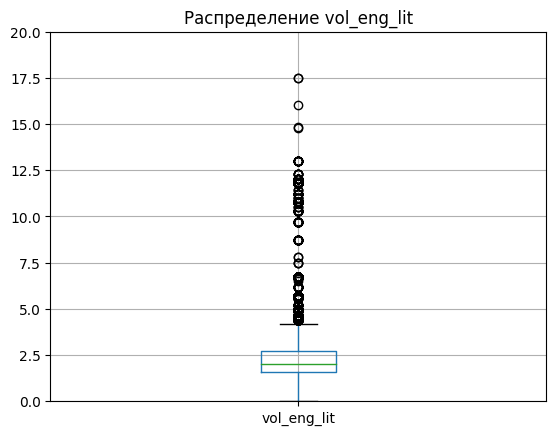

In [242]:
# посмотрим vol_eng_lit, quantity, price_usd на диаграмме размаха.
plt.title('Распределение vol_eng_lit')
plt.ylim(0, 20)
data.boxplot('vol_eng_lit')
data['vol_eng_lit'].describe()

Видим, что очень много выбросов.
Посмотрим на продажи машин у которых объем двигателя больше пяти.

In [243]:
df = data.loc[(data['vol_eng_lit'] >= 5)]

In [244]:
df_2 = df.groupby('class_2013').agg({'quantity': 'count'})
df_2.sort_values('quantity', ascending=False)

,quantity
class_2013,
Крупнотоннажные грузовики,847
Полноразмерные SUV,424
Малотоннажные грузовики,58
Компактные SUV,8
Среднеразмерные SUV,8
Большие автобусы,7
F класс,6
Среднетоннажные грузовики,3
B класс,2


посмотрим авто начиная с Компактные SUV




In [245]:
df.loc[(df['class_2013'] == 'Компактные SUV ')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
15488,Autokapital,Mercedes-Benz,GLS-Class,2017,USA,Бензин,5.5,Автомат,Полный привод,Алматы,NaN,1.0,86796.0,86796.0,г.Алматы,Внедорожники,Компактные SUV,K1,2019-03-01
15492,Autokapital,Mercedes-Benz,GLS-Class,2018,USA,Бензин,5.0,Автомат,Полный привод,Астана,NaN,1.0,81367.0,81367.0,г.Астана,Внедорожники,Компактные SUV,K1,2019-05-01
15495,Autokapital,Mercedes-Benz,GLS-Class,2018,USA,Бензин,5.0,Автомат,Полный привод,Шымкент,NaN,1.0,82468.0,82468.0,Южно-Казахстанская область,Внедорожники,Компактные SUV,K1,2019-07-01
15499,Autokapital,Mercedes-Benz,GLS-Class,2018,USA,Бензин,5.0,Автомат,Полный привод,Астана,NaN,1.0,79517.0,79517.0,г.Астана,Внедорожники,Компактные SUV,K1,2019-08-01
15500,Autokapital,Mercedes-Benz,GLS-Class,2018,USA,Бензин,5.0,Автомат,Полный привод,Шымкент,NaN,1.0,79517.0,79517.0,Южно-Казахстанская область,Внедорожники,Компактные SUV,K1,2019-08-01
15503,Autokapital,Mercedes-Benz,GLS-Class,2018,USA,Бензин,5.0,Автомат,Полный привод,Алматы,NaN,1.0,77403.0,77403.0,г.Алматы,Внедорожники,Компактные SUV,K1,2019-09-01
15504,Autokapital,Mercedes-Benz,GLS-Class,2018,USA,Бензин,5.0,Автомат,Полный привод,Астана,NaN,2.0,77403.0,154807.0,г.Астана,Внедорожники,Компактные SUV,K1,2019-09-01
15505,Autokapital,Mercedes-Benz,GLS-Class,2018,USA,Бензин,5.0,Автомат,Полный привод,Шымкент,,1.0,77403.0,77403.0,Южно-Казахстанская область,Внедорожники,Компактные SUV,K1,2019-09-01


In [246]:
df.loc[(df['class_2013'] == 'Среднеразмерные SUV ')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
930,Sivi Finance Consulting,Chevrolet,Tahoe,2016,BLR,Бензин,6.2,Автомат,Полный привод,Алматы,Физ. Лицо,1.0,76562.0,76562.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-01-01
931,Eurasia Motor Premium,Chevrolet,Tahoe,2016,BLR,Бензин,6.2,Автомат,Полный привод,Алматы,Физ. Лицо,1.0,82813.0,82813.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-02-01
932,Eurasia Motor Premium,Chevrolet,Tahoe,2016,BLR,Бензин,6.2,Автомат,Полный привод,Алматы,Физ. Лицо,1.0,81607.0,81607.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-04-01
933,Eurasia Motor Premium,Chevrolet,Tahoe,2016,BLR,Бензин,6.2,Автомат,Полный привод,Алматы,Физ. Лицо,1.0,79104.0,79104.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-06-01
934,Eurasia Motor Premium,Chevrolet,Tahoe,2016,BLR,Бензин,6.2,Автомат,Полный привод,Алматы,Физ. Лицо,1.0,76812.0,76812.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-07-01
935,Eurasia Motor Premium,Chevrolet,Tahoe,2018,USA,Бензин,6.2,Автомат,Полный привод,Алматы,Физ. Лицо,1.0,75758.0,75758.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-08-01
936,Eurasia Motor Premium,Chevrolet,Tahoe,2018,USA,Бензин,6.2,Автомат,Полный привод,Алматы,Юр. Лицо,1.0,75758.0,75758.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-08-01
937,Eurasia Motor Premium,Chevrolet,Tahoe,2018,USA,Бензин,6.2,Автомат,Полный привод,Алматы,Физ. Лицо,1.0,75758.0,75758.0,г.Алматы,Внедорожники,Среднеразмерные SUV,K1,2019-08-01


In [247]:
df.loc[(df['class_2013'] == 'Большие автобусы ')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
7132,Astana Motors,Hyundai Truck & Bus,Universe,2017,KOR,Дизель,12.3,Механика,Подключаемый привод,Атырау,Юр. Лицо,1.0,243827.0,243827.0,Атырауская область,Коммерческие автомобили,Большие автобусы,O,2019-02-01
7133,Astana Motors,Hyundai Truck & Bus,Universe,2017,KAZ,Дизель,12.3,Механика,Подключаемый привод,Атырау,Юр. Лицо,1.0,222640.0,222640.0,Атырауская область,Коммерческие автомобили,Большие автобусы,O,2019-03-01
7134,Astana Motors,Hyundai Truck & Bus,Universe,2017,KAZ,Дизель,12.3,Механика,Подключаемый привод,Атырау,Юр. Лицо,1.0,222640.0,222640.0,Атырауская область,Коммерческие автомобили,Большие автобусы,O,2019-03-01
7135,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,Universe,2017,KAZ,Дизель,12.3,Механика,Подключаемый привод,Алматы,Юр. Лицо,1.0,239204.0,239204.0,г.Алматы,Коммерческие автомобили,Большие автобусы,O,2019-05-01
7136,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,Universe,2017,KOR,Дизель,12.3,Механика,Подключаемый привод,Алматы,Юр. Лицо,4.0,228004.0,912016.0,г.Алматы,Коммерческие автомобили,Большие автобусы,O,2019-07-01
7137,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,Universe,2017,KAZ,Дизель,12.3,Механика,Подключаемый привод,Алматы,Юр. Лицо,2.0,219843.0,439687.0,г.Алматы,Коммерческие автомобили,Большие автобусы,O,2019-08-01
32068,MAN Truck & Bus Kazakhstan,MAN,R 61,2018,KAZ,Дизель,11.8,Механика,Подключаемый привод,Алматы,NaN,4.0,231402.0,925607.0,г.Алматы,Коммерческие автомобили,Большие автобусы,O,2019-04-01


In [248]:
df.loc[(df['class_2013'] == 'F класс ')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
164,Автоцентр-Бавария,BMW,7 серия,2017,DEU,Бензин,6.6,Автомат,Полный привод,Астана,NaN,1.0,143850.0,143850.0,г.Астана,Легковые автомобили,F класс,F,2019-07-01
168,Автоцентр-Бавария,BMW,7 серия,2017,DEU,Бензин,6.6,Автомат,Полный привод,Алматы,NaN,1.0,142169.0,142169.0,г.Алматы,Легковые автомобили,F класс,F,2019-08-01
6951,Astana Motors,Hyundai,Genesis G90,2018,KOR,Бензин,5.0,Автомат,Полный привод,Алматы,Юр. Лицо,1.0,103249.0,103249.0,г.Алматы,Легковые автомобили,F класс,F,2019-06-01
31910,Toyota Motor Kazakhstan,Lexus,LC,2017,JPN,Бензин,5.0,Автомат,Задний привод,Астана,Физ. Лицо,1.0,140434.0,140434.0,г.Астана,Легковые автомобили,F класс,F,2019-04-01
31911,Toyota Motor Kazakhstan,Lexus,LC,2017,JPN,Бензин,5.0,Автомат,Задний привод,Алматы,Физ. Лицо,1.0,140434.0,140434.0,г.Алматы,Легковые автомобили,F класс,F,2019-04-01
31912,Toyota Motor Kazakhstan,Lexus,LC,2017,JPN,Бензин,5.0,Автомат,Задний привод,Астана,Физ. Лицо,1.0,132471.0,132471.0,г.Астана,Легковые автомобили,F класс,F,2019-07-01


In [249]:
df.loc[(df['class_2013'] == 'B класс ')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
18030,УзАвто-Казахстан,Ravon,Nexia R3,2018,KAZ,Бензин,6.5,Автомат,Подключаемый привод,Атырау,Физ. Лицо,1.0,9370.0,9370.0,Атырауская область,Легковые автомобили,B класс,B,2019-06-01
18031,УзАвто-Казахстан,Ravon,Nexia R3,2018,KAZ,Бензин,5.5,Автомат,Подключаемый привод,Атырау,Физ. Лицо,1.0,9370.0,9370.0,Атырауская область,Легковые автомобили,B класс,B,2019-06-01


Единственный, у кого не может быть объем двигателя более пяти  - это Nexia R3. Удалим.

In [250]:
data.index[(data['model'] == 'Nexia R3' ) & (data['vol_eng_lit']>= 5 )].tolist()

[18030, 18031]

In [251]:
data = data.drop(index=[18030, 18031])

count    32292.000000
mean         1.335470
std          2.089722
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         91.000000
Name: quantity, dtype: float64

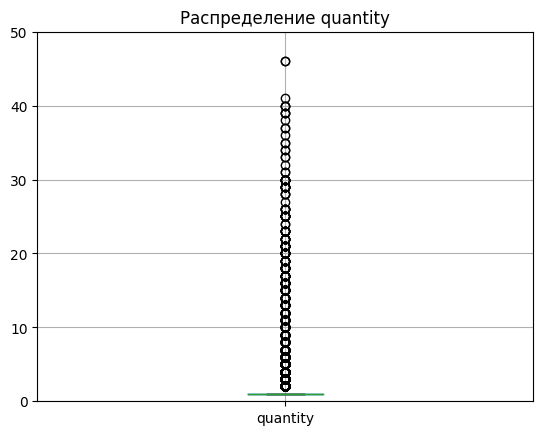

In [252]:
# посмотрим vol_eng_lit, quantity, price_usd на диаграмме размаха.
plt.title('Распределение quantity')
plt.ylim(0, 50)
data.boxplot('quantity')
data['quantity'].describe()

В основном покупают по одной машине, но очень много выбросов. Предположим, что один физик может купить пять машин для перепродажи, открытия такси/каршеринга, для сдачи в аренду.

In [253]:
df = data.loc[(data['quantity'] > 5)]

In [254]:
df.groupby('client_type').agg({'quantity': 'count'}).sort_values('quantity', ascending=False)

,quantity
client_type,
Юр. Лицо,26
Физ. Лицо,2


In [255]:
df.loc[(df['client_type'] == 'Физ. Лицо')]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
31104,Mercur Auto,Volkswagen,Polo,2018,RUS,Бензин,1.6,Автомат,Подключаемый привод,Алматы,Физ. Лицо,6.0,17499.0,104993.0,г.Алматы,Легковые автомобили,B класс,B,2019-06-01
31475,Mercur Auto,Volkswagen,Tiguan,2018,RUS,Бензин,2.0,Робот,Полный привод,Алматы,Физ. Лицо,6.0,39618.0,237711.0,г.Алматы,Внедорожники,Компактные SUV,K1,2019-05-01


Может быть

In [256]:
data.loc[(data['quantity'] > 50)]

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
11978,БИПЭК АВТО,Lada,4x4,2018,KAZ,Бензин,1.70,Механика,Полный привод,Шымкент,NaN,56.0,9000.0,504000.0,Южно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,2019-07-01
12031,БИПЭК АВТО,Lada,4x4,2018,KAZ,Бензин,1.69,Механика,Полный привод,Астана,NaN,56.0,9000.0,504000.0,г.Астана,Внедорожники,Субкомпактные SUV,K1,2019-09-01
13292,БИПЭК АВТО,Lada,Vesta,2018,KAZ,Бензин,1.60,Механика,Передний привод,Караганда,NaN,91.0,11600.0,1055600.0,Карагандинская область,Легковые автомобили,B класс,B,2019-06-01


Так же оставим, марка авто популярная. Может курс был выгодный для массовой покупки авто.

count     32292.000000
mean      29443.587978
std       21948.954373
min        4571.000000
25%       15068.000000
50%       22391.000000
75%       34336.000000
max      298875.000000
Name: price_usd, dtype: float64

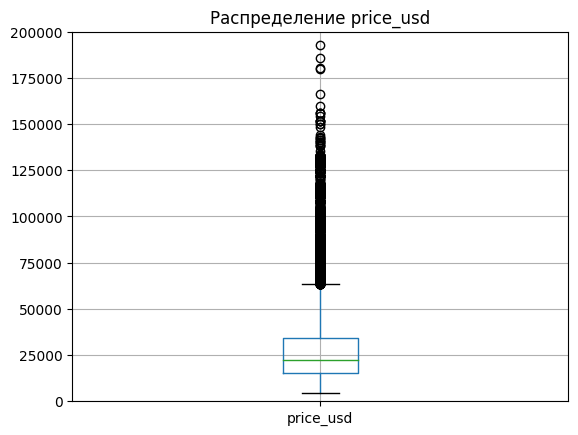

In [257]:
# посмотрим vol_eng_lit, quantity, price_usd на диаграмме размаха.
plt.title('Распределение price_usd')
plt.ylim(0, 200000)
data.boxplot('price_usd')
data['price_usd'].describe()

In [258]:
df = data.loc[(data['price_usd'] > 60000)]

In [259]:
df_2 = df.groupby('class_2013').agg({'price_usd': 'mean'})
df_2.sort_values('price_usd', ascending=False)

,price_usd
class_2013,
Спортивные автомобили,146046.250000
F класс,127272.426471
Большие автобусы,100666.533333
Полноразмерные SUV,95393.287582
Малотоннажные грузовики,82848.241379
E класс,81297.085714
Крупнотоннажные грузовики,80978.970149
Полноразмерный Минивэн,76409.000000
Среднеразмерные SUV,73689.520000


В целом, распределение средней цены нормальное.

In [260]:
data

,company,brand,model,year,country_manufacturer,type_of_fuel,vol_eng_lit,transmission,type_of_drive,region,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,сегментация eng,date
0,Mercur Auto,Audi,A3,2017,DEU,Бензин,1.40,Робот,Передний привод,Алматы,Физ. Лицо,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,2019-03-01
1,Mercur Auto,Audi,A3,2018,DEU,Бензин,1.40,Робот,Передний привод,Алматы,Физ. Лицо,1.0,30581.0,30581.0,г.Алматы,Легковые автомобили,C класс,C,2019-05-01
2,Mercur Auto,Audi,A3,2018,DEU,Бензин,1.40,Робот,Передний привод,Алматы,Физ. Лицо,1.0,35088.0,35088.0,г.Алматы,Легковые автомобили,C класс,C,2019-06-01
3,Mercur Auto,Audi,A3,2017,DEU,Бензин,1.40,Робот,Передний привод,Алматы,Физ. Лицо,1.0,26608.0,26608.0,г.Алматы,Легковые автомобили,C класс,C,2019-07-01
4,Mercur Auto,Audi,A4,2017,DEU,Бензин,2.00,Робот,Полный привод,Алматы,Юр. Лицо,1.0,48344.0,48344.0,г.Алматы,Легковые автомобили,D класс,D,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,Газовый,4.88,Механика,Подключаемый привод,Астана,Юр. Лицо,1.0,77336.0,77336.0,г.Астана,Коммерческие автомобили,Большие автобусы,O,2019-07-01
32290,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,Газовый,4.88,Механика,Подключаемый привод,Астана,Юр. Лицо,1.0,77336.0,77336.0,г.Астана,Коммерческие автомобили,Большие автобусы,O,2019-07-01
32291,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,Газовый,4.88,Механика,Подключаемый привод,Астана,Юр. Лицо,1.0,77336.0,77336.0,г.Астана,Коммерческие автомобили,Большие автобусы,O,2019-07-01
32292,Allur Auto,ANKAI,HFF6850HGQ4,2018,KAZ,Газовый,4.88,Механика,Подключаемый привод,Астана,Юр. Лицо,1.0,77336.0,77336.0,г.Астана,Коммерческие автомобили,Большие автобусы,O,2019-07-01


In [261]:
data = data.drop(columns = ['client_type', 'сегментация eng'], axis = 1)

In [262]:
# сбросим индекс
data = data.reset_index()
del data['index']

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32292 entries, 0 to 32291
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company               32292 non-null  object        
 1   brand                 32292 non-null  object        
 2   model                 32292 non-null  object        
 3   year                  32292 non-null  int64         
 4   country_manufacturer  32292 non-null  object        
 5   type_of_fuel          32292 non-null  object        
 6   vol_eng_lit           32266 non-null  float64       
 7   transmission          32292 non-null  object        
 8   type_of_drive         32292 non-null  object        
 9   region                32292 non-null  object        
 10  quantity              32292 non-null  float64       
 11  price_usd             32292 non-null  float64       
 12  sale_usd              32292 non-null  float64       
 13  area            

Данные готовы к дальнейшему исследованию.

# Исследование данных

## Топовые марки на рынке Казахстана: в денежном и натуральном выражении (5-10 марок)

In [264]:
df = data.groupby('brand').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
df.head(10)

,quantity
brand,
Lada,9660.0
Toyota,9169.0
Hyundai,5703.0
GAZ,2111.0
Kia,1815.0
Ravon,1725.0
Nissan,1662.0
Renault,1339.0
UAZ,1085.0


- Самая продаваемая марка LADA, далее идёт Toyota, Hyundai и GAZ

In [265]:
df = data.groupby('brand').agg({'price_usd': 'mean'}).sort_values('price_usd', ascending=True)
df.head(10)

,price_usd
brand,
Ravon,9930.615652
Lada,10650.905866
Renault,14005.631381
Lifan,14026.517668
Chevrolet,14275.232593
Peugeot,14349.954545
Jac,14351.733539
UAZ,15242.819517
SsangYong,17276.214286


- Так же видим, что LADA в топе самых дешевых авто

## Динамика продаж в целом по рынку (помесячно)

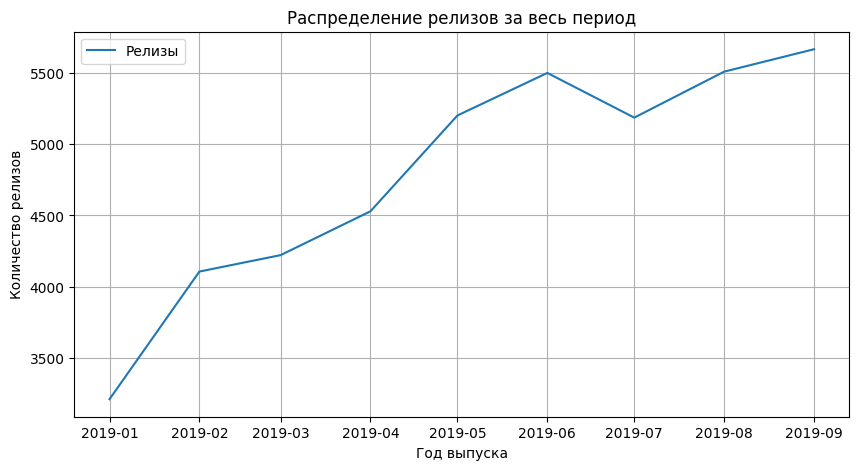

In [266]:
plt.figure(figsize=(10,5))
plt.plot(data.groupby('date')['quantity'].sum(), label='Релизы')
plt.legend()
plt.grid( True )
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.title('Распределение релизов за весь период')
plt.show()

In [267]:
events = (data.
          groupby('date').
          agg({'quantity': 'sum'}).
          reset_index().
          rename(columns={'quantity' : 'total'}))
events

,date,total
0,2019-01-01,3213.0
1,2019-02-01,4107.0
2,2019-03-01,4222.0
3,2019-04-01,4529.0
4,2019-05-01,5200.0
5,2019-06-01,5498.0
6,2019-07-01,5185.0
7,2019-08-01,5507.0
8,2019-09-01,5664.0


Больше всего продаж было в сентябре 2019 года. В целом, продажи росли, только небольшой спад был в июле.

## Динамика продаж по категориям (помесячно): тип топлива, сегмент

In [268]:
type_of_fuel = data.pivot_table(
    index = 'date',
    columns = 'type_of_fuel',
    values = 'quantity',
    aggfunc = 'sum'
    ).fillna(0)
type_of_fuel

type_of_fuel,Бензин,Газовый,Гибрид,Дизель,Электрический
date,,,,,
2019-01-01,3086.0,0.0,1.0,126.0,0.0
2019-02-01,3910.0,0.0,1.0,196.0,0.0
2019-03-01,4051.0,0.0,0.0,171.0,0.0
2019-04-01,4282.0,0.0,3.0,244.0,0.0
2019-05-01,4920.0,0.0,1.0,276.0,3.0
2019-06-01,5239.0,0.0,7.0,229.0,23.0
2019-07-01,4872.0,38.0,6.0,269.0,0.0
2019-08-01,5213.0,0.0,2.0,292.0,0.0
2019-09-01,5346.0,0.0,3.0,315.0,0.0


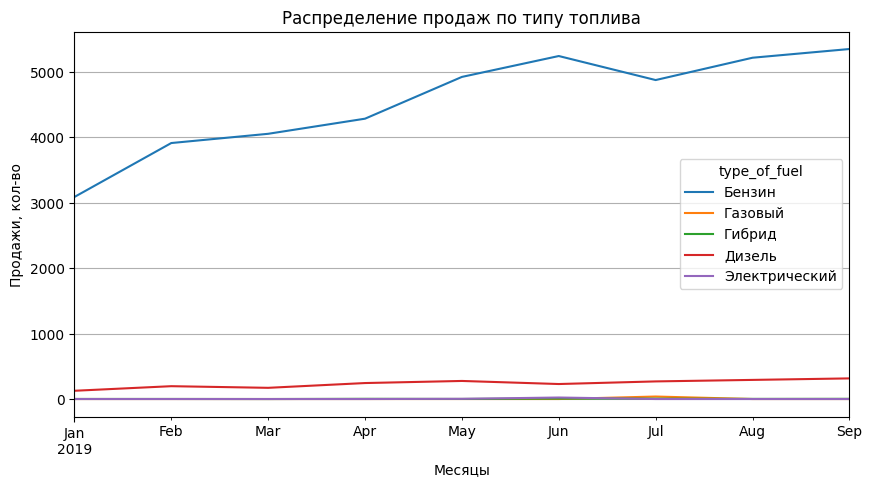

In [269]:
type_of_fuel = type_of_fuel[['Бензин', 'Газовый', 'Гибрид', 'Дизель', 'Электрический']]
ax = type_of_fuel.plot(figsize=(10,5))
plt.xticks(rotation = 0)
plt.grid( True )
ylab = ax.set_ylabel('Продажи, кол-во')
xlab = ax.set_xlabel('Месяцы')
plt.title('Распределение продаж по типу топлива')
plt.show()

- Авто на бензине покупают чаще. Неудивительно, на рынке в основном машины на бензине. Далее идёт Дизель. Остальные виды примерно на одном уровне продаж.

In [270]:
segmentation_2013 = data.pivot_table(
    index = 'segmentation_2013',
    #columns = 'quantity',
    values = 'quantity',
    aggfunc = 'sum'
    ).fillna(0)
segmentation_2013.sort_values('quantity', ascending=False)

,quantity
segmentation_2013,
Легковые автомобили,19915.0
Внедорожники,17596.0
Коммерческие автомобили,4679.0
Пикапы,874.0
Минивэны,61.0


In [271]:
segmentation_2013 = data.pivot_table(
    index = 'date',
    columns = 'segmentation_2013',
    values = 'quantity',
    aggfunc = 'sum'
    ).fillna(0)
segmentation_2013

segmentation_2013,Внедорожники,Коммерческие автомобили,Легковые автомобили,Минивэны,Пикапы
date,,,,,
2019-01-01,1176.0,305.0,1642.0,9.0,81.0
2019-02-01,1615.0,461.0,1925.0,6.0,100.0
2019-03-01,1660.0,483.0,1999.0,2.0,78.0
2019-04-01,1923.0,535.0,1956.0,4.0,111.0
2019-05-01,1971.0,608.0,2521.0,17.0,83.0
2019-06-01,2149.0,525.0,2676.0,9.0,139.0
2019-07-01,2094.0,553.0,2420.0,9.0,109.0
2019-08-01,2498.0,607.0,2298.0,1.0,103.0
2019-09-01,2510.0,602.0,2478.0,4.0,70.0


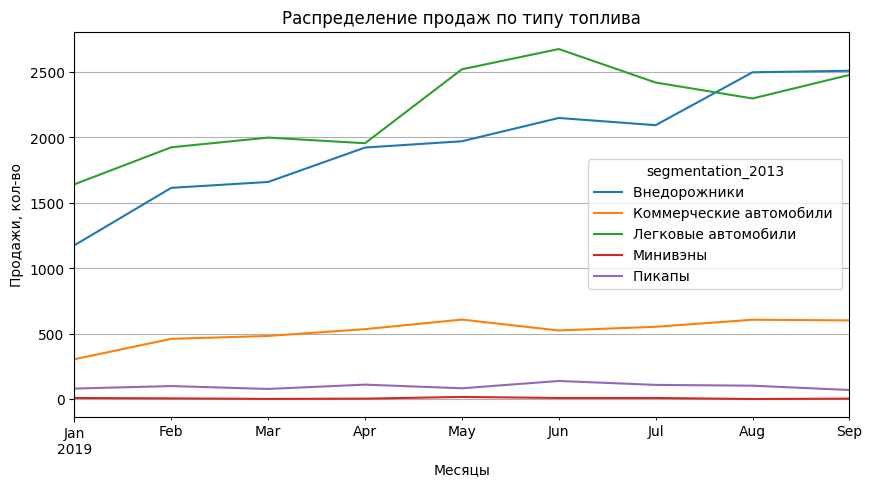

In [272]:
#class_2013 = class_2013[['B класс', 'Компактные SUV', 'Субкомпактные SUV', 'E класс', 'C класс', 'Среднеразмерные SUV', 'Стандартные SUV']]
ax = segmentation_2013.plot(figsize=(10,5))
plt.xticks(rotation = 0)
plt.grid( True )
ylab = ax.set_ylabel('Продажи, кол-во')
xlab = ax.set_xlabel('Месяцы')
plt.title('Распределение продаж по типу топлива')
plt.show()

- Больше всего продаж легковых машин, в целом идет рост продаж, но присутствует небольшой спад в июне.
- Меньше всего купили минивэны.

## Продажи по автоцентрам

In [273]:
company = data.pivot_table(
    index = 'company',
    #columns = 'quantity',
    values = 'quantity',
    aggfunc = 'sum'
    ).fillna(0)
company.sort_values('quantity', ascending=False)

,quantity
company,
БИПЭК АВТО,12750.0
Toyota Motor Kazakhstan,10194.0
Astana Motors,5781.0
Вираж,3358.0
Nissan Manufacturing RUS,1761.0
УзАвто-Казахстан,1725.0
Allur Auto,1267.0
Renault Россия,1088.0
Mercur Auto,1070.0


- БИПЭК АВТО расположен в нескольких регионах Казахстана.

## Продажи по регионам

In [274]:
region = data.pivot_table(
    index = 'region',
    #columns = 'quantity',
    values = 'quantity',
    aggfunc = 'sum'
    ).fillna(0)
region.sort_values('quantity', ascending=False)

,quantity
region,
Алматы,11426.0
Астана,8431.0
Атырау,3165.0
Шымкент,2727.0
Костанай,2644.0
Караганда,2556.0
Уральск,1879.0
Усть-Каменогорск,1866.0
Актау,1866.0


- Алмата центр, неудивительно что там больлше всего продаж.

# Итоги

Мы провели большую работу по восстановлению данных.

В ходе исследования выявили :
- самая продаваемую марка LADA
- самый продаваемый месяц из предоставленного периода - сентябрь
- больше продаж авто на бензине, далее на дизеле. Электрические машины не особо популярны.
- легковых машин продали больше всего, далее - внедорожников
- больше всего продал авто БИПЭК АВТО	и Toyota Motor Kazakhstan
- так же в городе Алмате продали больше всего АВТО.